# **MScFE 690 Capstone**

## Applying Algorithmic Generative Modeling for Detecting High Order Dependencies between stocks
Cellular Automata as Algorithmic Generative Model using Algorithmic Information Dynamics for patterns matching in the study of Cross-Sectional Ranking and High Order Dependencies between stocks

Key Components of this study
* Algorithmic Complexity and Block Decomposition Method
* Minimal Information Loss Methods
* Cellular Automata
* Genetic Algorithms

Key Objectives are:
1. Determine if Elementary Cellular Automata (ECA) rules can model the complex relationships between stocks
2. Identify the ECA rule(s) that best match the actual market data according to MILS algorithm mentioned below
3. Gain insight into the patterns and rules that govern the market behavior

## Timer Decorator

In [ ]:
from time import time

def timer(func):
  def wrapper(*args, **kwargs):
    start = time()
    result = func(*args, **kwargs)
    end = time()
    elapsed = (end-start)/60
    print(f"{func.__name__} took {elapsed:.2f} mins")
    return result
  return wrapper




## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Capstone/eca_images_1r

/content/drive/MyDrive/Colab Notebooks/Capstone/eca_images_1r


## 1. Data Engineering
We have selected 8 stocks and collected their daily price change for a continuous period of 192 days. We encode the sign and magnitude of change using 1 bit and 3 bit respectively. Therefore, we have 32 bits encoded price change data for the rest of our analysis. We name this 2D binary array as O for observed market data.

In [ ]:
#alternatively it is easier to retrieve daily closing prices from Yahoo Finance
import pandas as pd
import yfinance as yf
import datetime

# Define start and end dates
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2023, 6, 30)

# Define list of stock tickers
#tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'META', 'TSLA', 'NVDA', 'JPM']
tickers = ['AAPL', 'BA', 'CAT', 'DIS', 'GE', 'IBM', 'MSFT', 'TSLA']

# Retrieve data for each stock ticker
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Print the first 5 rows of the data
print(data.head())
# Print the last 5 rows of the data
print(data.tail())

[*********************100%%**********************]  8 of 8 completed
                 AAPL          BA         CAT         DIS          GE  \
Date                                                                    
2018-01-02  40.776520  282.886414  136.692093  108.726059  103.101936   
2018-01-03  40.769428  283.801331  136.901001  109.192848  104.076767   
2018-01-04  40.958805  282.724396  138.781128  109.144241  106.255775   
2018-01-05  41.425129  294.322266  140.974594  108.550995  106.313110   
2018-01-08  41.271263  295.570679  144.517227  106.994987  104.822227   

                   IBM       MSFT       TSLA  
Date                                          
2018-01-02  111.800140  80.391853  21.368668  
2018-01-03  114.873291  80.765999  21.150000  
2018-01-04  117.199883  81.476830  20.974667  
2018-01-05  117.772461  82.487000  21.105333  
2018-01-08  118.482788  82.571175  22.427334  
                  AAPL          BA         CAT        DIS          GE  \
Date             

In [ ]:
df1 = data

# Calculate percent change across all 8 selected stocks
df1['AAPL Change'] = df1['AAPL'].pct_change()
df1['BA Change'] = df1['BA'].pct_change()
df1['CAT Change'] = df1['CAT'].pct_change()
df1['DIS Change'] = df1['DIS'].pct_change()
df1['GE Change'] = df1['GE'].pct_change()
df1['IBM Change'] = df1['IBM'].pct_change()
df1['MSFT Change'] = df1['MSFT'].pct_change()
df1['TSLA Change'] = df1['TSLA'].pct_change()

df_cleaned = df1

def get_magnitude(change):
    if change <= 0.02:
        return '000'
    elif change <= 0.04:
        return '001'
    elif change <= 0.08:
        return '010'
    elif change <= 0.12:
        return '011'
    elif change <= 0.16:
        return '100'
    elif change <= 0.20:
        return '101'
    elif change <= 0.24:
        return '110'
    else:
        return '111'

def get_code(change):
    if change >= 0:
        sign = '1'
        mag = get_magnitude(change)
    else:
        sign = '0'
        change *= -1
        mag = get_magnitude(change)
    return sign + mag

strings = []
for date, aapl, ba, cat, dis, ge ,ibm, msft, tsla in zip(df_cleaned.index.date,
    df_cleaned['AAPL Change'], df_cleaned['BA Change'],
    df_cleaned['CAT Change'], df_cleaned['DIS Change'],
    df_cleaned['GE Change'], df_cleaned['IBM Change'],
    df_cleaned['MSFT Change'], df_cleaned['TSLA Change']):

    aapl_code = get_code(aapl)
    ba_code = get_code(ba)
    cat_code = get_code(cat)
    dis_code = get_code(dis)
    ge_code = get_code(ge)
    ibm_code = get_code(ibm)
    msft_code = get_code(msft)
    tsla_code = get_code(tsla)

    strings.append(aapl_code + ba_code + cat_code + dis_code +
                   ge_code + ibm_code + msft_code + tsla_code)



In [ ]:
# Defined constant for encoding purposes
DATE_LEN = 10
TOTAL_LEN = 192

### Encode Observed Market Data

In [ ]:
eca_input_string = strings[0]

In [ ]:
import numpy as np

study_strings = strings[0:TOTAL_LEN]

encoded_strings = []

for i in range(len(study_strings)):
    s = study_strings[i]
    encoded_data = s
    encoded_strings.append(encoded_data)

# Convert to 2D numpy array
observed_data_arr = np.array([list(s) for s in encoded_strings]).astype(int)


In [18]:
observed_data_arr

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
observed_data_arr.shape

(192, 32)

### Count input images files

In [ ]:
import os

# Function to get list of subfolders
def get_subfolder_list(folder_path):

  subfolders = []

  for entry in os.listdir(folder_path):

    full_path = os.path.join(folder_path, entry)

    if os.path.isdir(full_path):
      subfolders.append(full_path)

  return subfolders



In [ ]:
import glob
import os

def get_filenames(folder):

  file_count = 0
  filenames = []

  name_patterns = [
    'eca_images*.pkl',
    'eca_images*_*.pkl',
    'eca_images*_*_*.pkl'
  ]

  for pattern in name_patterns:
    files = glob.glob(os.path.join(folder, pattern))
    filenames.extend(files)
    file_count += len(files)

  print(f"Total files in {folder}: {file_count}")

  unique_filenames = set(filenames)
  return unique_filenames


In [ ]:
import os
import glob

def count_unique_files(folder_path):

  file_count = 0

  subfolders = get_subfolder_list(folder_path)
  print(f"count : subfolders : {subfolders}")
  for subfolder in subfolders:

    filenames = get_filenames(subfolder)

    file_count += len(filenames)

  return file_count

# Usage
# folder_path = '/path/to/folder'
# total_files = count_unique_files(folder_path)
# print(f"Total matching unique files: {total_files}")

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/eca_images_1r'
num_files = count_unique_files(folder_path)
print(f"Number of unique files: {num_files}")

count : subfolders : []
Number of unique files: 0


In [ ]:
# superceded
import glob
import os

filenames = []
filenames.extend(glob.glob('eca_images*.pkl'))
filenames.extend(glob.glob('eca_images*_*.pkl'))
filenames.extend(glob.glob('eca_images*_*_*.pkl'))

unique_filenames = set(filenames)

num_files = len(unique_filenames)

print(f"Number of unique files: {num_files}")

Number of unique files: 18811


In [ ]:
unique_filenames = num_files
unique_filenames

61536

### Load ECA Images

In [ ]:
import re
import os

name_patterns = [
  r'eca_images(?P<rule1>[0-9]{1,3}).pkl',
  r'eca_images(?P<rule1>[0-9]{1,3})_(?P<rule2>[0-9]{1,3}).pkl',
  r'eca_images(?P<rule1>[0-9]{1,3})_(?P<rule2>[0-9]{1,3})_(?P<rule3>[0-9]{1,3}).pkl'
]

def parse_filename(filename):

  filename = os.path.basename(filename)

  for pattern in name_patterns:
    match = re.match(pattern, filename)
    if match:
      rule1 = int(match.group("rule1"))

      if "rule2" in match.groupdict():
        rule2 = int(match.group("rule2"))
      else:
        rule2 = None

      if "rule3" in match.groupdict():
        rule3 = int(match.group("rule3"))
      else:
        rule3 = None

      return (rule1, rule2, rule3)

  return (None, None, None)

In [ ]:
import pickle
import numpy as np

eca_images = {}
total_images = 0

folder_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/eca_images_1r'

unique_filenames = get_filenames(folder_path)

for filename in unique_filenames:

  # Extract rules from filename
  rule1, rule2, rule3 = parse_filename(filename)
  print(f'rule1 rule2 rule3 : {rule1} {rule2} {rule3}')


  with open(filename, 'rb') as f:
    ca = pickle.load(f)

  # Convert to NumPy array if needed
  if not isinstance(ca, np.ndarray):
    ca = np.array(ca)

  # Store array under rule keys
  if rule3 is not None:
    if rule1 not in eca_images:
      eca_images[rule1] = {}
    if rule2 not in eca_images[rule1]:
      eca_images[rule1][rule2] = {}
    eca_images[rule1][rule2][rule3] = ca
    total_images += 1


  elif rule2 is not None:
    if rule1 not in eca_images:
      eca_images[rule1] = {}
    eca_images[rule1][rule2] = ca
    total_images += 1

  else:
    eca_images[rule1] = ca
    total_images += 1

print(f'Total number of eca images: {total_images}')

Total files in /content/drive/MyDrive/Colab Notebooks/Capstone/eca_images_1r: 256
rule1 rule2 rule3 : 198 None None
rule1 rule2 rule3 : 56 None None
rule1 rule2 rule3 : 176 None None
rule1 rule2 rule3 : 99 None None
rule1 rule2 rule3 : 112 None None
rule1 rule2 rule3 : 224 None None
rule1 rule2 rule3 : 40 None None
rule1 rule2 rule3 : 152 None None
rule1 rule2 rule3 : 204 None None
rule1 rule2 rule3 : 139 None None
rule1 rule2 rule3 : 33 None None
rule1 rule2 rule3 : 241 None None
rule1 rule2 rule3 : 154 None None
rule1 rule2 rule3 : 11 None None
rule1 rule2 rule3 : 102 None None
rule1 rule2 rule3 : 255 None None
rule1 rule2 rule3 : 158 None None
rule1 rule2 rule3 : 7 None None
rule1 rule2 rule3 : 223 None None
rule1 rule2 rule3 : 248 None None
rule1 rule2 rule3 : 95 None None
rule1 rule2 rule3 : 200 None None
rule1 rule2 rule3 : 57 None None
rule1 rule2 rule3 : 232 None None
rule1 rule2 rule3 : 138 None None
rule1 rule2 rule3 : 58 None None
rule1 rule2 rule3 : 44 None None
rule1 rule2

In [ ]:
total_images = 0

for x in range(256):
  for y in range(256):
    try:
      if isinstance(eca_images[x][y], np.ndarray):
        total_images += 1
    except KeyError as e:
      print(f"Key ({x}, {y}) not found in eca_images")


print(f'Total number of eca images: {total_images}')

Key (9, 0) not found in eca_images
Key (9, 1) not found in eca_images
Key (9, 2) not found in eca_images
Key (9, 3) not found in eca_images
Key (9, 4) not found in eca_images
Key (9, 5) not found in eca_images
Key (9, 6) not found in eca_images
Key (9, 7) not found in eca_images
Key (9, 8) not found in eca_images
Key (9, 9) not found in eca_images
Key (9, 10) not found in eca_images
Key (9, 11) not found in eca_images
Key (9, 12) not found in eca_images
Key (9, 13) not found in eca_images
Key (9, 14) not found in eca_images
Key (9, 15) not found in eca_images
Key (9, 16) not found in eca_images
Key (9, 17) not found in eca_images
Key (9, 18) not found in eca_images
Key (9, 19) not found in eca_images
Key (9, 20) not found in eca_images
Key (9, 21) not found in eca_images
Key (9, 22) not found in eca_images
Key (9, 23) not found in eca_images
Key (9, 24) not found in eca_images
Key (9, 25) not found in eca_images
Key (9, 26) not found in eca_images
Key (9, 27) not found in eca_images
Ke

In [ ]:
print(rule1, rule2, rule3)

107 181 None


In [ ]:
eca_images[131].shape

(192, 32)

In [ ]:
len(eca_images[10])

192

#### Testing subset of images

In [ ]:
import pickle
import numpy as np

eca_images = {}
min_rule1 = 255
max_rule1 = 0
min_rule2 = None
max_rule2 = None
min_rule3 = None
max_rule3 = None

for filename in unique_filenames:

  # Extract rules from filename
  rule1, rule2, rule3 = parse_filename(filename)
  print(f'rule1 rule2 rule3 : {rule1} {rule2} {rule3}')

  if rule1 < min_rule1:
    min_rule1 = rule1
  elif rule1 > max_rule1:
    max_rule1 = rule1

  if rule2 != None:
    if min_rule2 == None:
      min_rule2 = rule2
    elif rule2 < min_rule2:
      min_rule2 = rule2
    elif max_rule2 == None:
      max_rule2 = rule2
    elif rule2 > max_rule2:
      max_rule2 = rule2

  if rule3 != None:
    if min_rule3 == None:
      min_rule3 = rule3
    elif rule3 < min_rule3:
      min_rule3 = rule3
    elif max_rule3 == None:
      max_rule3 = rule3
    elif rule3 > max_rule3:
      max_rule3 = rule3

  with open(filename, 'rb') as f:
    ca = pickle.load(f)

  # Convert to NumPy array if needed
  if not isinstance(ca, np.ndarray):
    ca = np.array(ca)

  # Store array under rule keys
  if rule3 is not None:
    if rule1 not in eca_images:
      eca_images[rule1] = {}
    if rule2 not in eca_images[rule1]:
      eca_images[rule1][rule2] = {}
    eca_images[rule1][rule2][rule3] = ca

  elif rule2 is not None:
    if rule1 not in eca_images:
      eca_images[rule1] = {}
    eca_images[rule1][rule2] = ca

  else:
    eca_images[rule1] = ca

print(f'min_rule1 max_rule1 : {min_rule1} {max_rule1}')
print(f'min_rule2 max_rule2 : {min_rule2} {max_rule2}')
print(f'min_rule3 max_rule3 : {min_rule3} {max_rule3}')


rule1 rule2 rule3 : 0 131 None
rule1 rule2 rule3 : 0 133 None
rule1 rule2 rule3 : 0 140 None
rule1 rule2 rule3 : 0 77 None
rule1 rule2 rule3 : 0 4 None
rule1 rule2 rule3 : 0 147 None
rule1 rule2 rule3 : 0 30 None
rule1 rule2 rule3 : 0 32 None
rule1 rule2 rule3 : 0 113 None
rule1 rule2 rule3 : 0 61 None
rule1 rule2 rule3 : 0 55 None
rule1 rule2 rule3 : 0 160 None
rule1 rule2 rule3 : 0 63 None
rule1 rule2 rule3 : 0 100 None
rule1 rule2 rule3 : 0 138 None
rule1 rule2 rule3 : 0 143 None
rule1 rule2 rule3 : 0 43 None
rule1 rule2 rule3 : 0 57 None
rule1 rule2 rule3 : 0 125 None
rule1 rule2 rule3 : 0 132 None
rule1 rule2 rule3 : 0 12 None
rule1 rule2 rule3 : 0 142 None
rule1 rule2 rule3 : 0 128 None
rule1 rule2 rule3 : 0 154 None
rule1 rule2 rule3 : 0 37 None
rule1 rule2 rule3 : 0 112 None
rule1 rule2 rule3 : 0 108 None
rule1 rule2 rule3 : 0 78 None
rule1 rule2 rule3 : 0 8 None
rule1 rule2 rule3 : 0 64 None
rule1 rule2 rule3 : 0 73 None
rule1 rule2 rule3 : 0 15 None
rule1 rule2 rule3 : 0 52 N

In [ ]:
print(min_rule1, max_rule1, min_rule2, max_rule2, max_rule3, max_rule3)

0 117 0 255 None None


#### Visual Inspection

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int32)


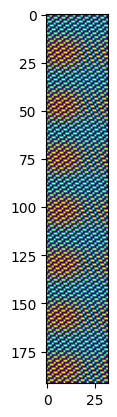

In [ ]:
import pprint

image = eca_images[131]
# Print nested structure

pprint.pprint(image)

# Log contents at each level
# print("Level 1:", eca_images[106])
# print("Level 2:", eca_images[106][54])
# print("Level 3:", eca_images[106][54][54])
# print("Level 4:", eca_images)

# Check type of each level
# print(type(eca_images[106]))
# print(type(eca_images[106][54]))

# Check the type to know how to plot it
# print(type(eca_images[106][54][54]))

# For example, if it's a numpy array:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [ ]:
image_array = eca_images[41][0][0]
image_array.shape

(192, 32)

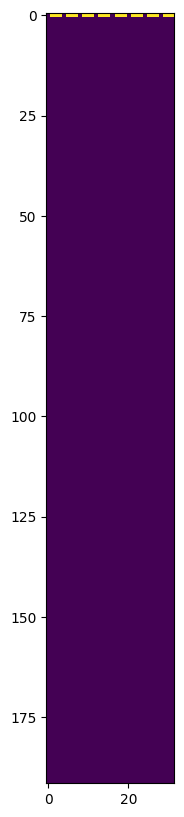

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_array)
plt.show()

## 2. Elementary Cellular Automata (ECA)
* An ECA is used to generate 2D arrays of binary values  using rules composition as described in https://arxiv.org/abs/1802.08769
* We use the first encoded price change data as the initial cells configuration of an ECA to begin the process of evolving the initial cell state for the next 192 steps or iterations by applying one or more of a set of 256 rules encoded using 8 bits on the initial row of cells.  We name all these generated 2D binary arrays as Gs for generated market data.  Rules can be composed as defined in https://arxiv.org/abs/1802.08769. We allow maximum of 3 rules in any composition.  Thus, rules are encoded in a 8 bit x 3 long binary sequence, named ECA_Rule.
- Reference: https://cellpylib.org and https://arxiv.org/abs/1802.08769

In [ ]:
pip install git+https://github.com/lantunes/cellpylib.git

  Cloning https://github.com/lantunes/cellpylib.git to /tmp/pip-req-build-rddjkuy4
  Running command git clone --filter=blob:none --quiet https://github.com/lantunes/cellpylib.git /tmp/pip-req-build-rddjkuy4
  Resolved https://github.com/lantunes/cellpylib.git to commit 743e936d48f8520f6f4ac652570ac7bb46414189
  Preparing metadata (setup.py) ... done
  Created wheel for cellpylib: filename=cellpylib-2.4.0-py3-none-any.whl size=37923 sha256=9148e8deaf6630671e7931e36d5dddf201217fd1522c452a21c903484b29f028
  Stored in directory: /tmp/pip-ephem-wheel-cache-zxv9emz1/wheels/33/9c/95/2f801091f0c1a3e71e37af261dd977e384a20710ac04c7cf5f
Successfully built cellpylib


### Custom ECA Image Generation

In [ ]:
 eca_input_string = '01110111011101110111011101110111'

#### Perform a quick visual test

Use any of one of the following 88 essential rules for better effect
* 8 Class 1 ECA rules (0, 8, 32, 40, 128, 136, 160, 168)
* 65 Class 2 ECA rules (1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23,
24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 42, 43, 44, 46, 50, 51, 56, 57,
58, 62, 72, 73, 74, 76, 77, 78, 94, 104, 108, 130, 132, 134, 138, 140, 142,
152, 154, 156, 162, 164, 170, 172, 178, 184, 200, 204, 232)
* 11 Class 3 ECA rules (18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150)
* 4 class 4 rules (41, 54, 106, 110)


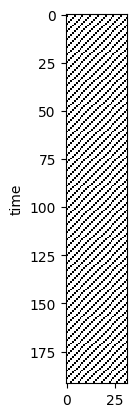

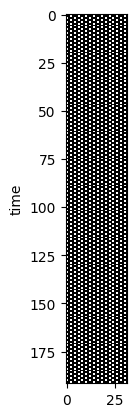

In [ ]:
import numpy as np
import cellpylib as cpl
import pickle

# Get list of all 256 possible ECA rules
all_eca_rules = [
     0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
     16, 17, 18, 19, 20, 21, 22 ,23, 24, 25, 26, 27, 28, 29, 30, 31,
     32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
     48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
     64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
     80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
     96, 97, 98, 99, 100,101,102,103,104,105,106,107,108,109,110,111,
     112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,
     128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,
     144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,
     160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,
     176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,
     192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,
     208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
     224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,
     240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
]

# Convert input data to list of integers
int_list = [int(bit) for bit in eca_input_string]

# Dictionary to store images
eca_images = {}
rule1 = 106
rule2 = 54
rule3 = 54
def triple_rules(rule1, rule2, rule3):
    def composed_rule(n, c, t):
        # Apply rule 1
        c1 = cpl.nks_rule(n, rule1)
        # Apply rule 2
        c2 = cpl.nks_rule(n, rule2)
        # Apply rule 3
        c3 = cpl.nks_rule(n, rule3)
        return c1*c2*c3
    return composed_rule
ca3 = cpl.evolve(np.array([int_list], dtype=int), timesteps=TOTAL_LEN,
                apply_rule=triple_rules(rule1, rule2, rule3))
cpl.plot(ca3)

ca = cpl.evolve(np.array([int_list], dtype=int), timesteps=TOTAL_LEN,
                apply_rule=lambda n, c, t: cpl.nks_rule(n,rule1))
cpl.plot(ca)

In [ ]:
# Save evolved CA
with open(f'eca_images{rule1}_{rule2}_{rule3}.pkl', 'wb') as f:
  pickle.dump(ca3, f)

#### Single Rule Generation

In [ ]:
import numpy as np
import cellpylib as cpl
import pickle

# Get list of all 256 possible ECA rules
all_eca_rules = [
     0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
     16, 17, 18, 19, 20, 21, 22 ,23, 24, 25, 26, 27, 28, 29, 30, 31,
     32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
     48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
     64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
     80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
     96, 97, 98, 99, 100,101,102,103,104,105,106,107,108,109,110,111,
     112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,
     128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,
     144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,
     160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,
     176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,
     192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,
     208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
     224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,
     240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
]

# Convert input data to list of integers
int_list = [int(bit) for bit in eca_input_string]

# Dictionary to store images
eca_images = {}
rule1 = 0
rule2 = 0
rule3 = 0

# Single Rule Generation
# Iterate over each individual ECA rule
# for rule1 in all_eca_rules:
for rule1 in range(0, len(all_eca_rules)):

    # Evolve CA with rule1
    ca1 = cpl.evolve(np.array([int_list], dtype=int), timesteps=TOTAL_LEN,
                     apply_rule=lambda n, c, t: cpl.nks_rule(n, rule1))

    # Save evolved CA
    with open(f'eca_images{rule1}.pkl', 'wb') as f:
        pickle.dump(ca1, f)

#### Double Rule Generation

In [ ]:
import numpy as np
import cellpylib as cpl
import pickle

# Get list of all 256 possible ECA rules
all_eca_rules = [
     0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
     16, 17, 18, 19, 20, 21, 22 ,23, 24, 25, 26, 27, 28, 29, 30, 31,
     32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
     48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
     64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
     80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
     96, 97, 98, 99, 100,101,102,103,104,105,106,107,108,109,110,111,
     112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,
     128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,
     144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,
     160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,
     176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,
     192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,
     208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
     224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,
     240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
]

# Convert input data to list of integers
int_list = [int(bit) for bit in eca_input_string]

# Dictionary to store images
eca_images = {}
rule1 = 0
rule2 = 0
rule3 = 0

def double_rules(rule1, rule2):
    def composed_rule(n, c, t):
        # Apply rule 1
        c1 = cpl.nks_rule(n, rule1)
        # Apply rule 2
        c2 = cpl.nks_rule(n, rule2)
        return c1*c2
    return composed_rule


# Double Rule Generation
# Iterate over each individual ECA rule
# for rule1 in all_eca_rules:
for rule1 in range(0, len(all_eca_rules)):

  # Iterate over each pair of ECA rules
  # for rule2 in all_eca_rules:
  for rule2 in range(0, len(all_eca_rules)):

    ca2 = cpl.evolve(np.array([int_list], dtype=int), timesteps=TOTAL_LEN,
                    apply_rule=double_rules(rule1, rule2))

    # Save evolved CA
    with open(f'eca_images{rule1}_{rule2}.pkl', 'wb') as f:
        pickle.dump(ca2, f)



#### Triple Rule Generation

In [ ]:
import numpy as np
import cellpylib as cpl
import pickle

# Get list of all 256 possible ECA rules
all_eca_rules = [
     0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
     16, 17, 18, 19, 20, 21, 22 ,23, 24, 25, 26, 27, 28, 29, 30, 31,
     32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
     48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
     64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
     80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
     96, 97, 98, 99, 100,101,102,103,104,105,106,107,108,109,110,111,
     112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,
     128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,
     144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,
     160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,
     176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,
     192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,
     208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,
     224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,
     240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
]

# Convert input data to list of integers
int_list = [int(bit) for bit in eca_input_string]

# Dictionary to store images
eca_images = {}
rule1 = 54
rule2 = 54
rule3 = 54

def triple_rules(rule1, rule2, rule3):
    def composed_rule(n, c, t):
        # Apply rule 1
        c1 = cpl.nks_rule(n, rule1)
        # Apply rule 2
        c2 = cpl.nks_rule(n, rule2)
        # Apply rule 3
        c3 = cpl.nks_rule(n, rule3)
        return c1*c2*c3
    return composed_rule


# Double Rule Generation
# Iterate over each individual ECA rule
# for rule1 in all_eca_rules:
for rule1 in range(0, len(all_eca_rules)):

  # Iterate over each pair of ECA rules
  # for rule2 in all_eca_rules:
  for rule2 in range(0, len(all_eca_rules)):

    # Iterate over each trio of ECA rules
    for rule3 in range(0, len(all_eca_rules)):
    # for rule3 in all_eca_rules:

      ca3 = cpl.evolve(np.array([int_list], dtype=int), timesteps=TOTAL_LEN,
                    apply_rule=triple_rules(rule1, rule2, rule3))

      # Save evolved CA
      with open(f'eca_images{rule1}_{rule2}_{rule3}.pkl', 'wb') as f:
        pickle.dump(ca3, f)



### Unzip and load 2D arrays

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/eca_images_1r

In [ ]:
import os
import zipfile
import time

def get_subfolder(parent_folder, count):

  subfolder_name = f"subfolder-{count}"
  subfolder_path = os.path.join(parent_folder, subfolder_name)

  return subfolder_path

def create_subfolder(parent_folder, count):

  subfolder_name = f"subfolder-{count}"
  subfolder_path = os.path.join(parent_folder, subfolder_name)

  os.makedirs(subfolder_path)

  return subfolder_path

def unzip_files(zip_file, output_folder):

  folder = {}
  file_count = 0
  subfolder_count = 0
  folder_stats = []
  extract_to = output_folder

  with zipfile.ZipFile(zip_file) as zf:

    for filename in zf.namelist():

      if file_count % 5000 == 0:

        subfolder = get_subfolder(output_folder, subfolder_count)
        extract_to = subfolder

        print(f"Processing Folder : {extract_to} subfolder count : {subfolder_count} file count : {file_count}")

        if os.path.exists(extract_to):
          subfolder_count += 1
        else:
          subfolder = create_subfolder(output_folder, subfolder_count)
          subfolder_count += 1

        folder = {
          'folder': subfolder,
          'file_count': 0
        }
        folder_stats.append(folder)

      extract_path = os.path.join(extract_to, filename)
      if os.path.exists(extract_path):
        file_count += 1
        folder['file_count'] += 1
        continue # skip extracting file

      zf.extract(filename, extract_to)
      file_count += 1
      folder['file_count'] += 1

      if file_count % 100 == 0:
        time.sleep(120) # delay 2 minute

  # Calculate totals
  total_files = sum(f['file_count'] for f in folder_stats)
  num_folders = len(folder_stats)

  print(f"Folders: {num_folders}")
  print(f"Total files: {total_files}")

  return folder_stats

# Usage
# zip_file = ...
# output_path = ...

# unzip_files(zip_file, output_path)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(eca_images[])
plt.show()

## 3. Minimal Algorithmic Information Loss Methods (MILS)

* Block Decompoisition Method (BDM)
 * This Github repository <https://github.com/sztal/pybdm> implements the BDM as defined in https://pybdm-docs.readthedocs.io/en/latest/theory.html
 * It is used by MILS described below to estimate the algorithmic complexity aka information content of a given 2D binary array
 * Reference:
    * https://github.com/sztal/pybdm
    * https://pybdm-docs.readthedocs.io/en/latest/theory.html


* MILS algorithm implements dimensional reduction and feature selection to minimise information loss and preserve maximal information on a given 2D binary array as described in https://arxiv.org/abs/1802.05843
* It first evaluate the potential information loss due to a row or column of the given 2D array.
* It then sort them in a list of candidate rows/cols to be deleted
* Finally, it proceeds to delete rows/cols starting with the first identified in the above sorted list of indices
* This Github repository <https://github.com/sztal/pybdm> implements MILS - based on theory https://pybdm-docs.readthedocs.io/en/latest/theory.html to estimate the algorithmic complexity of an input square 2D array of binary values
* Reference:
  * https://github.com/alyssa-adams/pymils
  * https://arxiv.org/abs/1802.05843

In [ ]:
pip install git+https://github.com/sztal/pybdm.git

  Cloning https://github.com/sztal/pybdm.git to /tmp/pip-req-build-3zwv96nb
  Running command git clone --filter=blob:none --quiet https://github.com/sztal/pybdm.git /tmp/pip-req-build-3zwv96nb
  Resolved https://github.com/sztal/pybdm.git to commit 4bedea1200998a8978ada1a708b4e1f98aacb2d8
  Preparing metadata (setup.py) ... done
  Created wheel for pybdm: filename=pybdm-0.1.0-py2.py3-none-any.whl size=39933844 sha256=1ae9895d713348542f61e42523fe5752b65fa9d996cb5179c2fd0f88cba0663b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ejulhrtk/wheels/67/6e/1c/64fedb780569cd521fe6933032437f99c23618d9d40ad769fd
Successfully built pybdm


In [ ]:
# Defined Constants
MIN_SIZE = 0.5 # 0-1 fraction of image size


In [19]:
from typing import Tuple
import random
import numpy as np
from pybdm import BDM


class PyMILS():
  """Perform the MILS compression algorithm."""

  def __init__(self, bdm_tool: BDM, min_size: float) -> None:
    self.bdm_tool = bdm_tool
    self.min_size = min_size

  def init_mils(self, img):
    """Initialize MILS algorithm.

    Calculates initial BDM, minimum dimensions, and number of
    row/column deletions needed.

    Args:
      img: Input image as NumPy array

    Returns:
      Tuple of (initial BDM, minimum rows, minimum cols,
               row deletions needed, col deletions needed)
    """

    initial_bdm = self.calculate_bdm(img)

    # Minimum size thresholds
    min_rows = int(self.min_size * img.shape[0])
    min_cols = int(self.min_size * img.shape[1])

    # Calculate number of row/col deletions needed
    row_dels = img.shape[0] - min_rows
    col_dels = img.shape[1] - min_cols

    return initial_bdm, min_rows, min_cols, row_dels, col_dels

  def calculate_bdm(self, img: np.ndarray) -> float:
    """Calculate the BDM complexity of an image."""

    try:
      bdm = self.bdm_tool.bdm(img)
    except Exception as e:
      raise ValueError("Error computing BDM") from e
    if bdm == 0:
      print('Computed BSM = 0')
    return bdm

  def sample_index(self, n: int) -> int:
    """
    Sample a random valid index to perturb.

    Args:
      n: Size of dimension

    Returns:
      Random row or column index
    """
    return random.choice(range(n))

  def evaluate_loss(self, img: np.ndarray, index: int) -> float:
    """
    Evaluate information loss from row/col deletion.

    Args:
      img: Input image
      index: Row or column index to delete

    Returns:
      Information loss from deleting index
    """
    perturbed = self.delete(img, index)
    original_bdm = self.calculate_bdm(img)
    perturbed_bdm = self.calculate_bdm(perturbed)
    return abs(original_bdm - perturbed_bdm)

  def delete(self, img: np.ndarray, index: int) -> np.ndarray:
    """
    Delete a row or column.

    Args:
      img: Input image
      index: Row or column index to delete

    Returns:
      Perturbed image
    """
    if index < 0 or index >= img.shape[0] + img.shape[1]:
      raise ValueError("Index out of bounds")

    # Delete row
    if index < img.shape[0]:
      return np.delete(img, index, axis=0)

    # Delete column
    else:
      return np.delete(img, index-img.shape[0], axis=1)

  def zero_out(self, img: np.ndarray, index: int) -> np.ndarray:

    if index < img.shape[0]:
      img[index,:] = 0

    else:
      img[:, index - img.shape[0]] = 0

    return img


  def meets_size_criteria(self, img, current_idx, min_size) -> bool:
    print(f'current_idx : {current_idx} min_size : {min_size}')

    if current_idx < img.shape[0]:
      # Row index, check rows
      current_size = img.shape[0]
      min_size = int(min_size * current_size)
      print(f'row min_size : {min_size}')
      return current_size > min_size

    else:
      # Col index, check cols
      current_size = img.shape[1]
      min_size = int(min_size * current_size)
      print(f'col min_size : {min_size}')
      return current_size > min_size

  def check_size_criteria(self, img, sorted_indices, sorted_losses, min_size):

    allowed_row_dels = int(img.shape[0] * (1 - min_size))
    allowed_col_dels = int(img.shape[1] * (1 - min_size))

    index_loss_pairs = zip(sorted_indices, sorted_losses)

    qualified_indices = []
    qualified_losses = []

    for i, loss in index_loss_pairs:

      if i < img.shape[0]:
        # Row deletion
        if len(qualified_indices) >= allowed_row_dels:
          break

        qualified_indices.append(i)
        qualified_losses.append(loss)

      else:
        # Col deletion
        if len(qualified_indices) >= allowed_col_dels:
          break

        qualified_indices.append(i)
        qualified_losses.append(loss)

    print(f'len qualified_indices : {len(qualified_indices)}')

    return qualified_indices, qualified_losses

  def mils(self, image, sorted_indices, sorted_losses):
    """
    Integrated MILS implementation using genetic algorithm.
    """

    # Set minimum image size
    min_size = 0.5

    current_complexity = self.calculate_bdm(image)
    # Set minimum complexity threshold
    relative_threshold = 0.5
    min_complexity = relative_threshold * current_complexity

    # Set minimum delta complexity to determine if it has stabilized
    min_delta = 0.001

    # Set maximum allowed complexity loss
    max_allowed_loss = 0.5 * current_complexity

    img = image
    prev_complexity = self.calculate_bdm(img)

    qualfied_indices, qualified_losses = self.check_size_criteria(image, sorted_indices, sorted_losses, min_size)
    print(f'qualified_indices : {qualfied_indices} qualified_losses : {qualified_losses} ')

    # Delete using by list of sorted losses
    for loss, i in zip(qualified_losses, qualfied_indices):

      img = self.zero_out(img, i)

      # Check complexity
      complexity = self.calculate_bdm(img)

      if complexity < min_complexity:
        print(f'Complexity threshold exceeded!')
        break

      # Check delta complexity
      delta = abs(complexity - prev_complexity)
      if delta < min_delta:
        print(f'Delta threshold exceeded!')
        break

      # Check info loss
      if loss > max_allowed_loss:
        print(f'Max Allowed Loss threshold exceeded!')
        break

      # Check min size limit
      # print(f'Checking min size using index {i}')
      # if self.meets_size_criteria(img, i, min_size):
      #   print(f'Size threshold exceeded at index {i}!')
      #   break

      prev_complexity = complexity

    #* Use np.delete() to delete rows/cols that were filled with zeros above
    # Delete rows/cols from original image
    # print(f'img.shape : {img.shape}')
    # print(f'image.shape : {image.shape}')

    row_indices = []
    col_indices = []

    for index_value in sorted_indices:

      if index_value < image.shape[0]:
        row_indices.append(index_value)
      else:
        col_indices.append(index_value - image.shape[0])

    # print(f'row_indices : {row_indices}')
    # print(f'col_indices : {col_indices}')
    print(f'len row_indices : {len(row_indices)}')
    print(f'len col_indices : {len(col_indices)}')

    compressed_image = np.delete(img, row_indices, axis=0)
    compressed_image = np.delete(compressed_image, col_indices, axis=1)
    #* Use np.delete() to delete rows/cols that were filled with zeros above

    return compressed_image


## 5. Evotorch Genetic Algorithm (EGA)
* This Github repository https://github.com/nnaisense/evotorch implements a genetic algorithm that is used for 2 purposes in this project
  * Firstly, to perform row/col selection of an input 2D array of binary values using EGA by minimising the total information loss of each row/col if each is deleted from the original image.
  * Secondly, to perform eca_rule selection (single, double or triple rule composition) using EGA by minimising the information distance between a target image and generated image using a candidate eca_rule.
* Reference:
  * https://github.com/nnaisense/evotorch

In [20]:
pip install evotorch

### RowColSelection Problem

In [21]:
from evotorch import Problem, Solution

# Define problem
class RowColSelection(Problem):

  def __init__(self, image, pymils,
               objective_sense,
               dtype,
               initial_bounds):

    self.input_image = image
    self.pymils = pymils
    solution_length = image.shape[0] + image.shape[1]

    super().__init__(
      objective_sense,
      solution_length=solution_length,
      dtype=dtype,
      initial_bounds=initial_bounds
    )

  def _evaluate(self, solution: Solution):
    evals = objective(solution, self.input_image, self.pymils)
    solution.set_evals(evals)

# Row/Col Selection fitness function
def objective(solutions, image, pymils):
  """
  Objective function to evaluate fitness of a mask Solution.
  """

  # Convert mask to boolean tensor
  #mask = Solution(mask).values.bool()
  # print(f'inside objective: mask is {mask}')

  losses = []

  for i, bit in enumerate(solutions):
    if bit:
        # Delete row/col
        # img = self.pymils.delete(self.input_image, i)

        # Get information loss
        loss = pymils.evaluate_loss(image, i)

        losses.append(loss)

  # print(f"Losses : {sum(losses)}")

  return sum(losses)



### GA Operators

In [22]:
from evotorch.operators import Operator
from evotorch.operators import CrossOver

# Define binary mutation operator
class BinaryMutation(Operator):

  def __init__(self, problem, mutation_prob):
    self.mutation_prob = mutation_prob
    super().__init__(problem)

  def _do(self, solutions):

    sln_values = solutions.access_values()
    #print("Solution bits:", *sln_values)

    for i in range(sln_values.shape[0]):

      if random.random() < self.mutation_prob:

        # Randomly select a bit position to flip
        pos = torch.randint(0, sln_values.shape[1], (1,))

        # print(f"Mutating population of shape: {solutions.values_shape}")
        # print(f"Before mutation: {sln_values}")

        # Save pre-mutation version
        pre_mutation = sln_values[i].clone()

        # Flip the bit
        sln_values[i, pos] = 1 - sln_values[i, pos]

        # print(f"After mutation: {sln_values}")
        # print(f"Mutation position: {pos}")

        # Count mutated bits
        num_mutated = (sln_values[i] != pre_mutation).sum()
        print(f"Num mutated: {num_mutated}")

    return

# Define binary crossover operator
class BinaryCrossOver(CrossOver):

  def __init__(self, problem, tournament_size):
    super().__init__(problem, tournament_size=tournament_size)

  def _do_cross_over(self, parents1, parents2):
    # a parent tensor consists of [number of parents, solution_length]

    num_parents_pairs = len(parents1)
    solution_length = self._problem._solution_length

    assert len(parents1) == len(parents2)

    children = SolutionBatch(self._problem, popsize=num_parents_pairs*2, empty=True)
    children_values = children.access_values()

    num_crossed_total = 0

    for i in range(num_parents_pairs):

      p1 = parents1[i]
      p2 = parents2[i]

      ### single crossover point
      # crossover_point = random.randint(0, solution_length-1)

      # child1 = torch.cat((p1[:crossover_point], p2[crossover_point:]))
      # child2 = torch.cat((p2[:crossover_point], p1[crossover_point:]))
      ###

      # Generate uniform crossover mask
      mask = torch.bernoulli(0.5 * torch.ones(solution_length))

      # Apply mask to create children
      child1 = torch.where(mask==1, p1, p2)
      child2 = torch.where(mask==0, p1, p2)

      children_values[i] = child1
      children_values[i+num_parents_pairs] = child2

      # Track bits crossed
      # crossover_bits = p1[crossover_point:]
      # num_crossed = len(set(crossover_bits))
      # num_crossed_total += num_crossed

      # Crossover rate = mean of mask values
      crossover_rate = mask.float().mean()

      print(f"Crossover rate: {crossover_rate:.2%}")

    # print(f"Total bits crossed: {num_crossed_total}")

    return children


### Compress 2D array

In [23]:
import torch
from evotorch import Problem, Solution, SolutionBatch
from evotorch.algorithms import GeneticAlgorithm
from evotorch.operators import Operator
from evotorch.operators import CrossOver
import random

# PyMILS class definition...

# RowColSelection class definition...

# BinaryMutation class definition...

# BinaryCrossOver class definition...

@timer
def compress_image(input_image):

  pymils = PyMILS(BDM(ndim=2), min_size=0.5)

  problem = RowColSelection(input_image, pymils,
                            'min', dtype=torch.int8, initial_bounds=(0, 1))

  pop_size = 50
  tournament_size = 10
  mutation_prob = 0.1

  crossover_op = BinaryCrossOver(problem, tournament_size=tournament_size)
  mutation_op = BinaryMutation(problem, mutation_prob=mutation_prob)

  ga = GeneticAlgorithm(
    problem,
    popsize=pop_size,
    operators=[crossover_op, mutation_op]
  )

  original_bdm = pymils.calculate_bdm(input_image)

  best_objectives = []
  best_solutions = []
  percent_losses = []
  num_generations = 50
  for gen in range(num_generations):

    # GA step
    ga.step()

    # Track best solution
    values = ga.population.values
    evals = ga.population.evals
    best_index = torch.argmin(evals)
    best_solution = ga.population[best_index]
    best_objective = evals[best_index]
    best_objectives.append(best_objective)
    best_solutions.append(best_solution)

    # Get losses from best solution
    losses = ga.population[0].evals

    # Calculate percent loss from losses
    loss = sum(losses) / original_bdm * 100

    percent_losses.append(loss)

  evals = ga.population.evals
  # print(f"evals before mils(): {evals}")

  # Initialize empty lists
  sorted_indices = []
  sorted_losses = []

  best_solution = ga.population[0] # 0th index will be best solution

  # Evaluate loss of each bit
  for i, bit in enumerate(best_solution):

    if bit:

      # Bit is 1, so get loss for this index
      loss = pymils.evaluate_loss(input_image, i)

      # Append index and loss
      sorted_indices.append(i)
      sorted_losses.append(loss)


  # print(f'{sorted_indices}')
  # print(f'{sorted_losses}')
  # print(f"len sorted_losses before mils(): {len(sorted_losses)}")
  # print(f"len Sorted_indices before mils(): {len(sorted_indices)}")

  # Sort losses to align with indices
  sorted_losses, sorted_indices = zip(*sorted(zip(sorted_losses, sorted_indices)))

  # losses contains pre-computed bit losses could be stored in problem.eval_data
  # Pass to MILS
  compressed_image = pymils.mils(input_image, sorted_indices, sorted_losses)

  # print(f"len sorted_losses after mils(): {len(sorted_losses)}")
  # print(f"len Sorted_indices after mils(): {len(sorted_indices)}")

  # return compressed_image
  return compressed_image, sorted_indices, sorted_losses, best_objectives, best_solutions, percent_losses


In [24]:
# Create input image
# input_image = np.random.randint(2, size=(32,32))

compressed_image, sorted_indices, sorted_losses, best_objectives, best_solutions, percent_losses \
  = compress_image(eca_images[131])



/usr/local/lib/python3.10/dist-packages/evotorch/core.py:3425: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  shares_storage = self._data.storage().data_ptr() == source._data.storage().data_ptr()


Crossover rate: 53.12%
Crossover rate: 47.77%
Crossover rate: 50.89%
Crossover rate: 50.45%
Crossover rate: 48.66%
Crossover rate: 51.79%
Crossover rate: 52.23%
Crossover rate: 49.55%
Crossover rate: 50.89%
Crossover rate: 53.57%
Crossover rate: 50.89%
Crossover rate: 47.32%
Crossover rate: 43.30%
Crossover rate: 51.34%
Crossover rate: 53.57%
Crossover rate: 48.21%
Crossover rate: 48.66%
Crossover rate: 52.23%
Crossover rate: 48.21%
Crossover rate: 41.07%
Crossover rate: 48.66%
Crossover rate: 48.66%
Crossover rate: 53.12%
Crossover rate: 46.88%
Crossover rate: 53.12%
Num mutated: 1
Crossover rate: 52.23%
Crossover rate: 49.55%
Crossover rate: 49.11%
Crossover rate: 46.88%
Crossover rate: 53.12%
Crossover rate: 49.11%
Crossover rate: 52.23%
Crossover rate: 50.00%
Crossover rate: 54.02%
Crossover rate: 48.66%
Crossover rate: 45.98%
Crossover rate: 48.21%
Crossover rate: 53.12%
Crossover rate: 56.70%
Crossover rate: 54.46%
Crossover rate: 56.25%
Crossover rate: 55.36%
Crossover rate: 51.

In [25]:
compressed_generated = compressed_image
compressed_generated.shape

(171, 28)

In [ ]:
observed_data_arr


array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
compressed_image, sorted_indices, sorted_losses, best_objectives, best_solutions, percent_losses \
  = compress_image(observed_data_arr)

Crossover rate: 49.55%
Crossover rate: 49.55%
Crossover rate: 50.45%
Crossover rate: 47.77%
Crossover rate: 48.66%
Crossover rate: 53.57%
Crossover rate: 50.00%
Crossover rate: 49.11%
Crossover rate: 50.89%
Crossover rate: 48.21%
Crossover rate: 48.66%
Crossover rate: 58.48%
Crossover rate: 52.68%
Crossover rate: 47.32%
Crossover rate: 49.11%
Crossover rate: 45.98%
Crossover rate: 47.77%
Crossover rate: 46.88%
Crossover rate: 55.36%
Crossover rate: 53.12%
Crossover rate: 55.80%
Crossover rate: 56.70%
Crossover rate: 54.91%
Crossover rate: 54.46%
Crossover rate: 44.20%
Num mutated: 1
Num mutated: 1
Num mutated: 1
Crossover rate: 45.09%
Crossover rate: 54.91%
Crossover rate: 55.36%
Crossover rate: 53.57%
Crossover rate: 50.45%
Crossover rate: 47.32%
Crossover rate: 45.09%
Crossover rate: 49.11%
Crossover rate: 53.57%
Crossover rate: 48.66%
Crossover rate: 48.21%
Crossover rate: 50.45%
Crossover rate: 49.11%
Crossover rate: 50.89%
Crossover rate: 47.77%
Crossover rate: 41.52%
Crossover ra

### Visualisation

In [ ]:
compressed_image.shape

(180, 32)

In [ ]:
compressed_observed = compressed_image

In [26]:
# grouped bar plot - information content - before and after compression
import matplotlib.pyplot as plt
import numpy as np

pymils = PyMILS(BDM(ndim=2), min_size=MIN_SIZE)

# Calculate BDM complexity
real_before_bdm = pymils.calculate_bdm(observed_data_arr)
real_after_bdm = pymils.calculate_bdm(compressed_observed)

sim_before_bdm = pymils.calculate_bdm(eca_images[131])
sim_after_bdm = pymils.calculate_bdm(compressed_generated)

# Plot grouped bar chart - bar heights based on BDM
index = np.arange(2)
bar_width = 0.35

plt.bar(index, [real_before_bdm, real_after_bdm], width=bar_width, label='Real')
plt.bar(index + bar_width, [sim_before_bdm, sim_after_bdm], width=bar_width, label='Simulated')

plt.xticks(index + bar_width/2, ('Before', 'After'))
# plt.legend(loc='lower right')
plt.legend()

plt.ylabel('Information Content')
plt.title('Information Content Before and After Compression')

plt.show()

# Calculate compression ratios
real_cmp_ratio = real_after_bdm / real_before_bdm
sim_cmp_ratio = sim_after_bdm / sim_before_bdm

# Print results
print(f"Real data compressed to {real_cmp_ratio*100:.2f}%")
print(f"Sim data compressed to {sim_cmp_ratio*100:.2f}%")

NameError: ignored

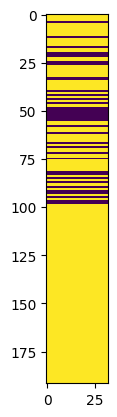

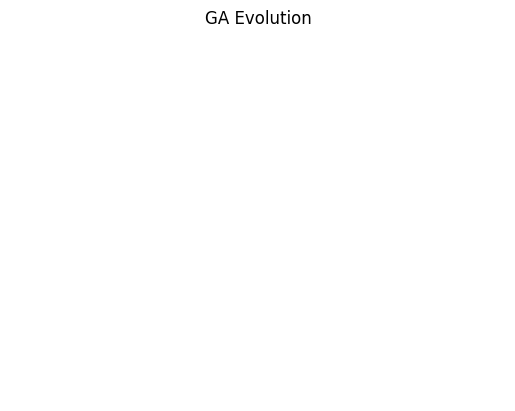

In [ ]:
# heatmap - GA compression sequence
import matplotlib.pyplot as plt

# Sample data
data = eca_images[255][255]

# Solutions
solutions = best_solutions

# Plot
fig, ax = plt.subplots()

# Set aspect and extent
ax.set_aspect('equal')
im = ax.imshow(data)
im.set_extent([0, data.shape[1], 0, data.shape[0]])

# Initialize image
im = ax.imshow(data, interpolation='nearest')

# Track removed
removed = set()

# Iterate solutions
for solution in solutions:

  # Update removed
  new_removals = set(np.where(solution==1)[0])
  removed.update(new_removals)

  # Create mask
  mask = np.ones_like(data)
  for idx in removed:
    r = idx // data.shape[1]
    c = idx % data.shape[1]
    mask[r, c] = 0

  # Mask data
  masked_data = np.ma.masked_where(mask==0, data)

  # Clear and re-plot
  im.axes.clear()
  im = ax.imshow(masked_data, interpolation='nearest')

  plt.pause(0.5)

plt.title('GA Evolution')
plt.axis('off')
plt.show()

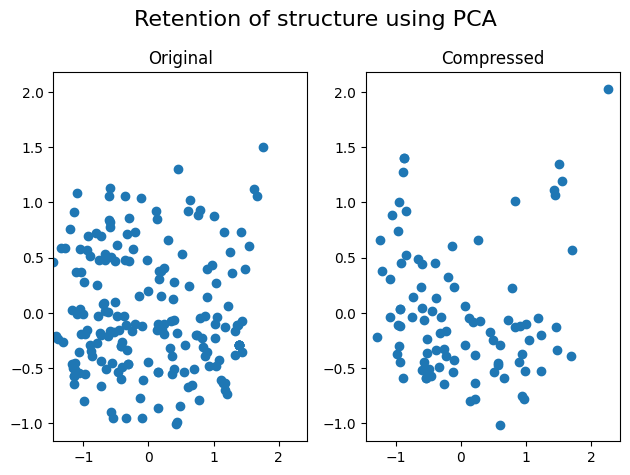

In [ ]:
# retention of structure
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample original data
orig_data = observed_data_arr

# Compress with MILS
compressed = compressed_observed

# Apply PCA to original
pca = PCA(n_components=2)
orig_pca = pca.fit_transform(orig_data)

# Apply PCA to compressed
compressed_pca = pca.fit_transform(compressed)

# Plot PCA projections
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(orig_pca[:,0], orig_pca[:,1])
ax2.scatter(compressed_pca[:,0], compressed_pca[:,1])

ax1.set_title('Original')
ax2.set_title('Compressed')

# Shared title
fig.suptitle('Retention of structure using PCA', fontsize=16)

# Match axes limits
ax1.set_xlim(ax2.get_xlim())
ax1.set_ylim(ax2.get_ylim())

fig.tight_layout()
plt.show()




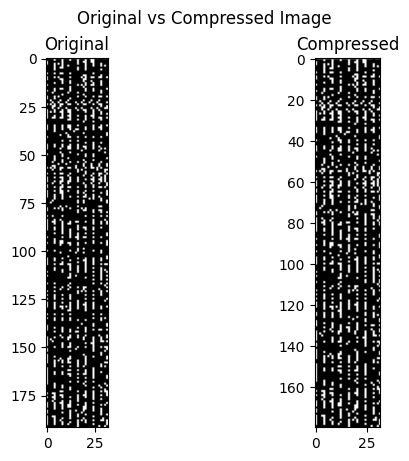

In [ ]:
# original vs compressed
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].imshow(observed_data_arr, cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(compressed_observed, cmap='gray')
axes[1].set_title('Compressed')

fig.suptitle('Original vs Compressed Image')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


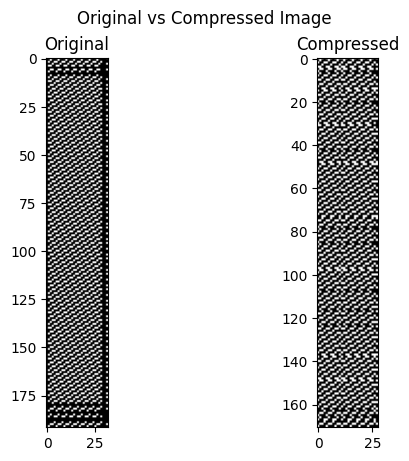

In [27]:
# original vs compressed
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].imshow(eca_images[131], cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(compressed_generated, cmap='gray')
axes[1].set_title('Compressed')

fig.suptitle('Original vs Compressed Image')
plt.show()

In [29]:
# After GA completes
def plot_sorted_losses(sorted_losses):
  # Plot losses
  plt.plot(sorted_losses)
  plt.title("Sorted Loss Values")

  plt.show()

In [30]:
def plot_step_losses(input_image, sorted_indices):

  # Setup subplots
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
  plt.subplots_adjust(wspace=0.3, hspace=0.4)

  # Original image
  axes[0,0].imshow(input_image, cmap='gray')
  axes[0,0].set_title('Original')

  # Initialize index counter
  idx = 0
  temp_image = input_image
  # Compression steps
  for i in range(4):

    # Get next index
    next_idx = sorted_indices[idx]
    # Remove next bit
    temp_image = pymils.delete(temp_image, next_idx)
    # Increment counter
    idx += 1

    axes[0,i+1].imshow(temp_image, cmap='gray')
    axes[0,i+1].set_title(f'Compression Step {i+1}')


  # Second row of plots
  for i in range(5):

    # Get next index
    next_idx = sorted_indices[idx]
    # Remove next bit
    temp_image = pymils.delete(temp_image, next_idx)
    # Increment counter
    idx += 1

    axes[1,i].imshow(temp_image, cmap='gray')
    axes[1,i].set_title(f'Compression Step {i+5}')


  plt.suptitle("MILS Compression Steps")
  plt.show()

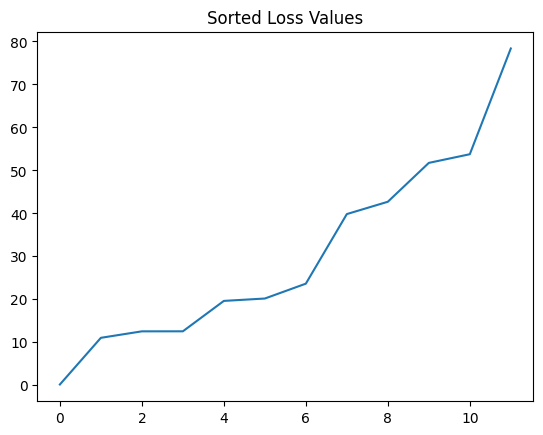

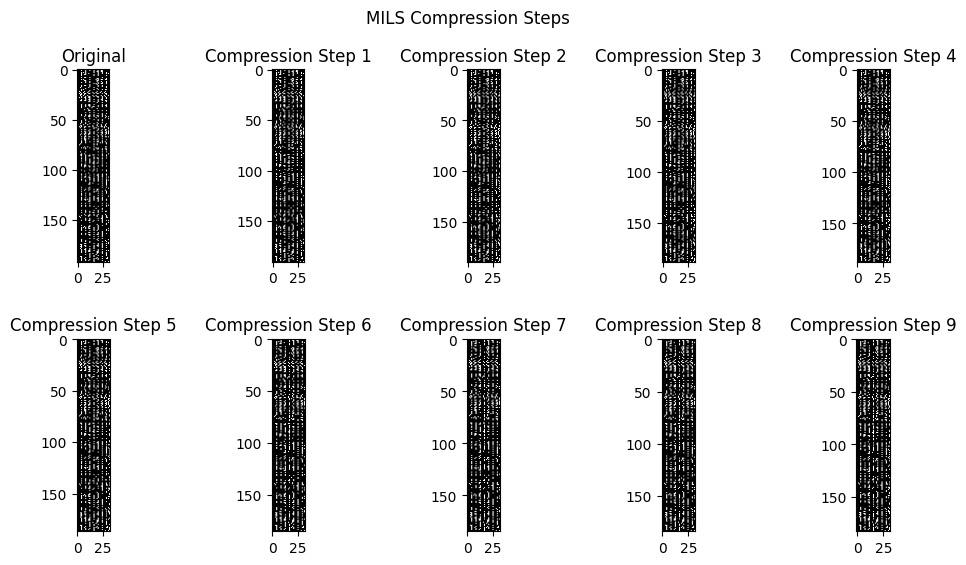

In [ ]:
# Visualisation for O
plot_sorted_losses(sorted_losses)
plot_step_losses(observed_data_arr, sorted_indices)

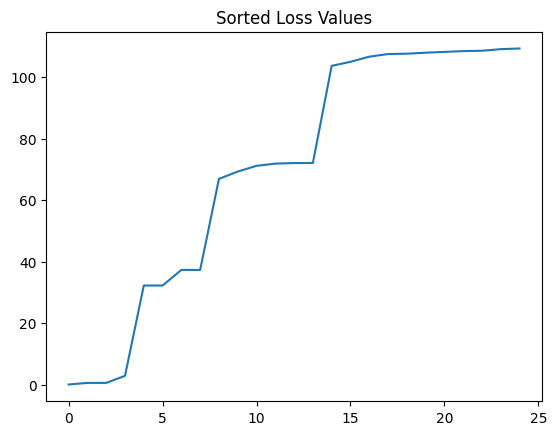

ValueError: ignored

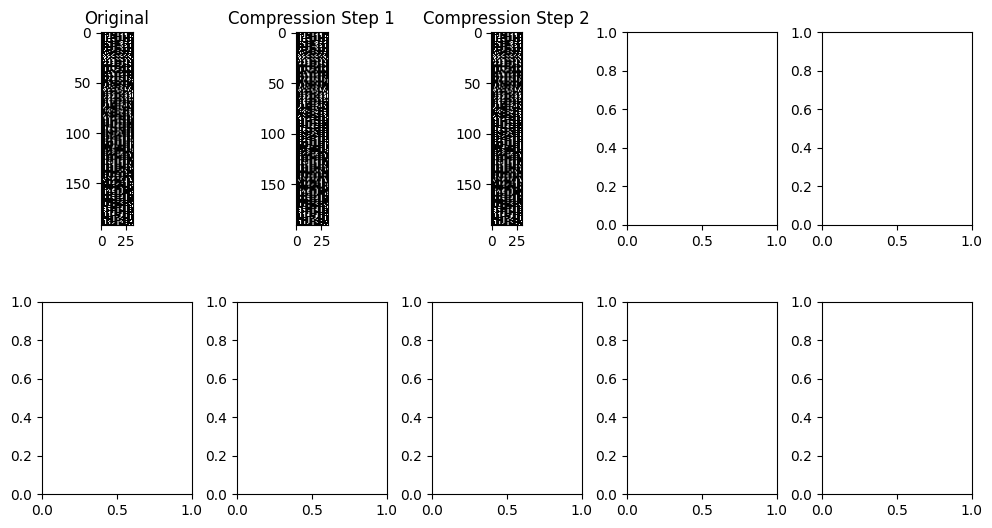

In [31]:
# Visualisation for G eca_images[131]
plot_sorted_losses(sorted_losses)
plot_step_losses(observed_data_arr, sorted_indices)

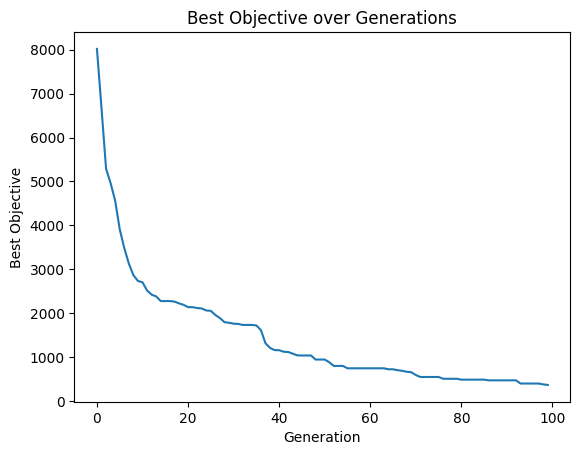

In [ ]:
import matplotlib.pyplot as plt

# using best_objectives returned by compress_image() for O

# Plot best objective vs generation
plt.plot(best_objectives)
plt.xlabel('Generation')
plt.ylabel('Best Objective')
plt.title('Best Objective over Generations')
plt.show()

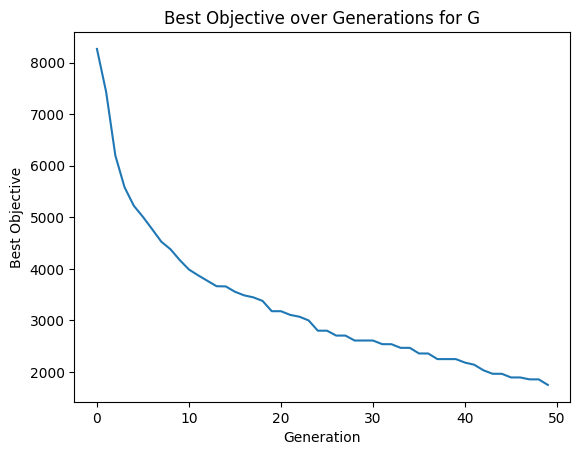

In [33]:
import matplotlib.pyplot as plt

# using best_objectives returned by compress_image() for G

# Plot best objective vs generation
plt.plot(best_objectives)
plt.xlabel('Generation')
plt.ylabel('Best Objective')
plt.title('Best Objective over Generations for G')
plt.show()

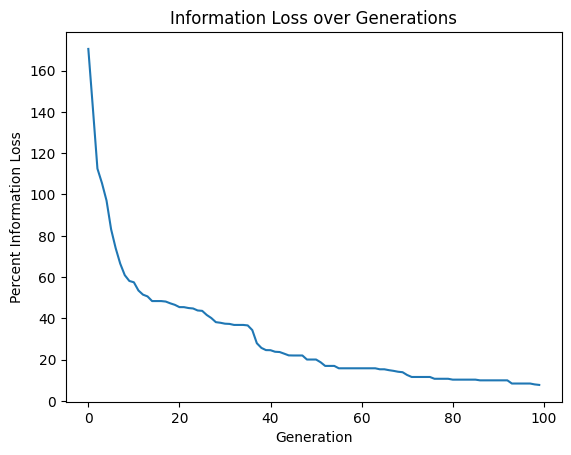

In [ ]:
# Assume percent_losses list collected stats

import matplotlib.pyplot as plt

# Plot percent loss over generations
plt.plot(percent_losses)

plt.xlabel('Generation')
plt.ylabel('Percent Information Loss')
plt.title('Information Loss over Generations')

plt.show()

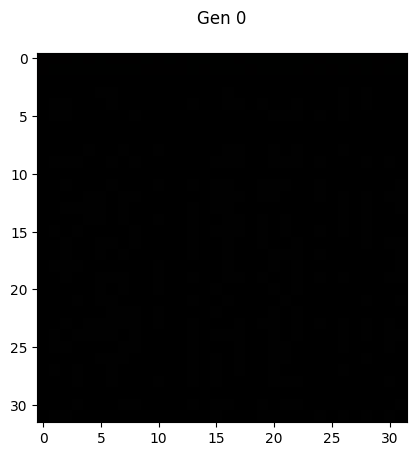

<Figure size 640x480 with 0 Axes>

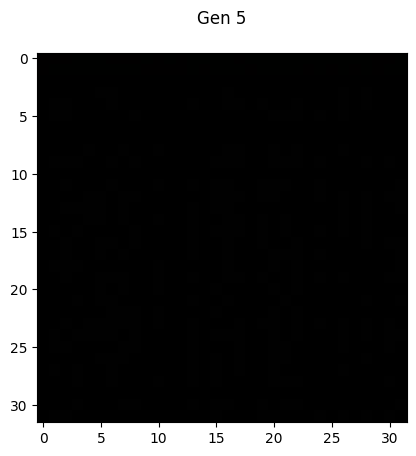

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def overlay_mask(img, mask):

  # Convert 2D image to 3D for color
  height, width = img.shape[:2]

  # Repeat values along channel dim
  img_3d = np.repeat(img[...,np.newaxis], 3, axis=-1)

  masked = img_3d.copy()

  for i, bit in enumerate(mask):

    row = i // width
    col = i % width

    # if bit == 1:

    #   # Retained - Red color
    #   masked[row, col, 0] = 1
    #   masked[row, col, 1] = 0
    #   masked[row, col, 2] = 0

    # else:

    #   # Deleted - Green color
    #   masked[row, col, 0] = 0
    #   masked[row, col, 1] = 1
    #   masked[row, col, 2] = 0

    if bit == 1:
      masked[row, col] = [1, 0, 0]  # Red

    else:
      masked[row, col] = [0, 1, 0] # Green

  return masked





num_generations = 10 # check with 'Putting themn together' section
for gen in range(num_generations):

  if gen % 5 == 0:

    mask = best_solutions[gen]
    caption = f'Gen {gen}\n'

    # Overlay mask
    masked = overlay_mask(input_image, mask)

    fig, ax = plt.subplots()
    ax.imshow(masked)
    ax.set_title(caption)
    plt.show()

    fig.savefig(f'gen-{gen}.png')
    plt.clf()







Sample mask value: 1
Input image shape: (32, 32)
Masked array shape: (32, 32, 3)
Sample masked value: [1 0 0]
Masked min, max values: 0 1


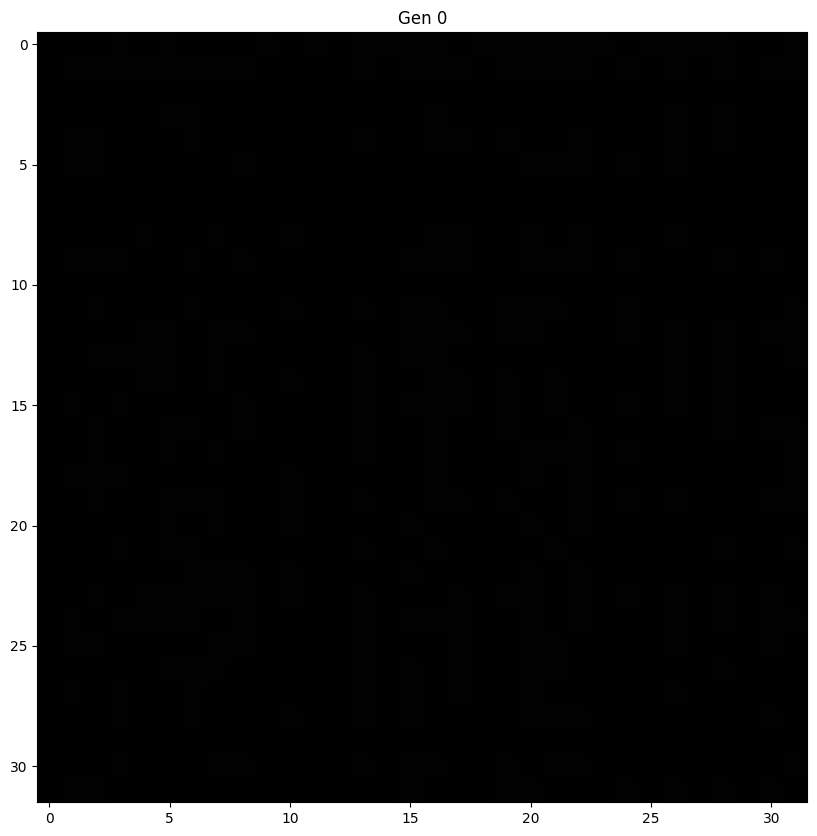

Sample mask value: 1
Input image shape: (32, 32)
Masked array shape: (32, 32, 3)
Sample masked value: [1 0 0]
Masked min, max values: 0 1


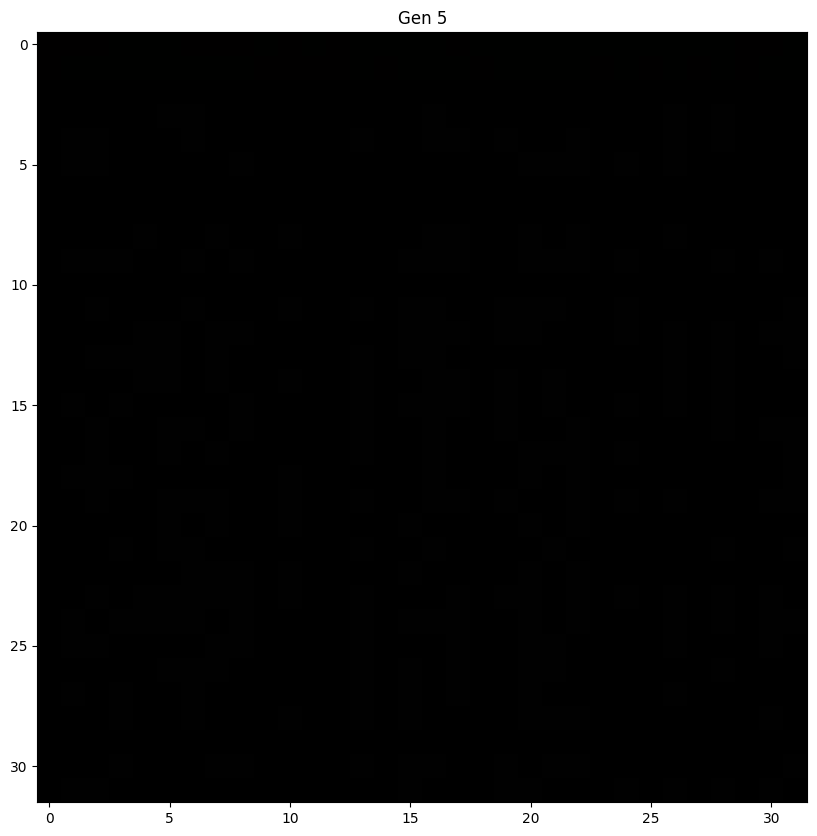

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def overlay_mask(img, mask):

  height, width = img.shape[:2]

  print("Input image shape:", img.shape)

  img_3d = np.repeat(img[...,np.newaxis], 3, axis=-1)

  masked = img_3d.copy()

  for i, bit in enumerate(mask):

    row = i // width
    col = i % width

    if bit == 1:
      masked[row, col] = [1, 0, 0]

    else:
      masked[row, col] = [0, 1, 0]

  print("Masked array shape:", masked.shape)
  print("Sample masked value:", masked[0,0])

  return masked


num_generations = 10

for gen in range(num_generations):

  if gen % 5 == 0:

    solution = best_solutions[gen]
    mask = solution.values
    mask = mask.numpy()

    print("Sample mask value:", mask[0])

    masked = overlay_mask(input_image, mask)

    print("Masked min, max values:", masked.min(), masked.max())

    fig, ax = plt.subplots(figsize=(10,10), dpi=100)

    img = masked
    ax.imshow(img, cmap=None, vmin=0, vmax=1)

    ax.set_title(f'Gen {gen}')
    plt.show()

### Compress all

In [ ]:
compressed_images = {}

for rule1 in eca_images:
  try:
    if isinstance(eca_images[rule1], np.ndarray):
      # Compress single image
      img = eca_images[rule1]
      compressed, indices, losses, objs, sols, percents = compress_image(img)
      compressed_images[rule1] = compressed

  except KeyError:
    print(f"Key {rule1} not found, continuing...")
    continue

  else:
    # Rule1 contains dict, iterate over rules2
    for rule2 in eca_images[rule1]:
      try:
        if isinstance(eca_images[rule1][rule2], np.ndarray):
          # Compress single image
          img = eca_images[rule1][rule2]
          compressed, indices, losses, objs, sols, percents = compress_image(img)
          compressed_images[rule1][rule2] = compressed

      except KeyError:
        print(f"Key {rule1}[{rule2}] not found, continuing...")
        continue

      else:
        # Rule2 contains dict, iterate over rule3
        for rule3 in eca_images[rule1][rule2]:
          try:
            # Compress single image
            img = eca_images[rule1][rule2][rule3]
            compressed, indices, losses, objs, sols, percents = compress_image(img)
            compressed_images[rule1][rule2][rule3] = compressed

          except KeyError:
            print(f"Key {rule1}[{rule2}][{rule3}] not found, continuing...")
            continue

## Matching O with Gs

In [ ]:
O = observed_data_arr
G = image_array

In [ ]:
O.shape

(192, 32)

In [ ]:
G.shape

(192, 32)

In [ ]:
eca_images = img_array
eca_images.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(192, 32)

### Best Rule Selection Problem

In [ ]:
from evotorch import Problem, Solution

# Define problem
class RuleSelection(Problem):

  def __init__(self, image, pymils,
               objective_sense,
               dtype,
               initial_bounds):

    self.target_image = image
    self.pymils = pymils
    solution_length = 1 * 8 # 1 rules, each 8 bits long, None is not allowed
    #solution_length = 3 * 9 # 3 rules, each 9 bits long to cater for None

    super().__init__(
      objective_sense,
      solution_length=solution_length,
      dtype=dtype,
      initial_bounds=initial_bounds
    )

  def _evaluate(self, solution: Solution):
    evals = objective(solution, self.target_image, self.pymils)
    solution.set_evals(evals)


def decode_rules(bits):

  rule1 = int(''.join(map(str, bits[0:8])), 2)

  return rule1


# Rule Selection and Matching fitness function
def objective(solution, target_image, pymils):

  bits = solution.values.numpy()
  print(f'objective : bits are {bits}')
  bits_list = bits.tolist()

  # Decode rules
  rule1 = decode_rules(bits_list)
  print(f'objective : rule1 is {rule1}')

  try:
    image = eca_images[rule1]
  except KeyError:
    print(f'objective : KeyError caught rule1 is {rule1} rule2 is {rule2}')
    return 10000.
  except Exception as e:
    print(f'objective : Other Error caught rule1 is {rule1} rule2 is {rule2}')
    print(type(e))
    print(e)
    return 10000.

  # Calculate BDM
  target_bdms = pymils.calculate_bdm(target_image)
  image_bdms = pymils.calculate_bdm(image)

  # Return difference in BDMs
  return torch.abs(torch.tensor(target_bdms) - torch.tensor(image_bdms))




In [ ]:
# For reference only
from evotorch import Problem, Solution

# Define problem
class RuleSelection(Problem):

  def __init__(self, image, pymils,
               objective_sense,
               dtype,
               initial_bounds):

    self.target_image = image
    self.pymils = pymils
    solution_length = 2 * 9 # 2 rules, each 9 bits long to cater for None
    #solution_length = 3 * 9 # 3 rules, each 9 bits long to cater for None

    super().__init__(
      objective_sense,
      solution_length=solution_length,
      dtype=dtype,
      initial_bounds=initial_bounds
    )

  def _evaluate(self, solution: Solution):
    evals = objective(solution, self.target_image, self.pymils)
    solution.set_evals(evals)

def decode_rules(bits):
  # 2 rules = 9 x 2 = 18 bits
  # Check if single rule
  if bits[17] == 1: # Rule 2 is None
    rule1 = int(''.join(map(str, bits[0:8])), 2)
    return (rule1, None)

  # Check if double rule
  elif bits[17] == 0 : # Rule 2 is valid
    rule1 = int(''.join(map(str, bits[0:8])), 2)
    rule2 = int(''.join(map(str, bits[9:17])), 2)
    return (rule1, rule2)

  # Invalid encoding
  else:
    raise ValueError("Invalid rule encoding")

def get_chunks(image):

  chunk_size = 32

  # Get image dimensions
  height, width = image.shape

  # Calculate number of chunks
  num_chunks_h = height // chunk_size
  num_chunks_w = width // chunk_size

  # Initialize empty list to hold chunks
  chunks = []

  # Loop through chunks
  for i in range(num_chunks_h):
    for j in range(num_chunks_w):

      # Slice chunk
      chunk = image[i*chunk_size:(i+1)*chunk_size,
                    j*chunk_size:(j+1)*chunk_size]

      # Append to chunks list
      chunks.append(chunk)

  return chunks

# Rule Selection and Matching fitness function
def objective(solution, target_image, pymils):

  bits = solution.values.numpy()
  print(f'objective : bits are {bits}')
  bits_list = bits.tolist()

  # Decode rules
  rule1, rule2 = decode_rules(bits_list)
  print(f'objective : rule1 is {rule1}')
  print(f'objective : rule2 is {rule2}')

  if (rule2 is None ):
    print(f'image does not exist!')
    return 10000.
  else:
    try:
      image = eca_images[rule1][rule2]
    except KeyError:
      print(f'objective : KeyError caught rule1 is {rule1} rule2 is {rule2}')
      return 10000.
    except Exception as e:
      print(f'objective : Exception caught rule1 is {rule1} rule2 is {rule2}')
      print(type(e))
      print(e)
      return 10000.
    else:
      print(f'objective : Other Error caught rule1 is {rule1} rule2 is {rule2}')
      return 10000.

  # Get chunks
  # target_chunks = get_chunks(target_image)
  # image_chunks = get_chunks(image)

  # Calculate BDM
  # target_bdms = [pymils.calculate_bdm(c) for c in target_chunks]
  # image_bdms = [pymils.calculate_bdm(c) for c in image_chunks]
  target_bdms = pymils.calculate_bdm(target_image)
  image_bdms = pymils.calculate_bdm(image)

  # Return difference in BDMs
  return torch.abs(torch.tensor(target_bdms) - torch.tensor(image_bdms))




In [ ]:
eca_images[41][0][0].shape

(192, 32)

### Putting them together,

In [ ]:
# Integrating all the above into here !
import torch
from evotorch import Problem, Solution, SolutionBatch
from evotorch.algorithms import GeneticAlgorithm
from evotorch.operators import Operator
from evotorch.operators import CrossOver
import random

# PyMILS class definition...

# RuleSelection class definition...

# BinaryMutation class definition...

# BinaryCrossOver class definition...


def match_image(input_image):

  pymils = PyMILS(BDM(ndim=2), min_size=0.5)

  problem = RuleSelection(input_image, pymils,
                            'min', dtype=torch.int8, initial_bounds=(0, 1))

  pop_size = 100
  tournament_size = 10
  mutation_prob = 0.1

  crossover_op = BinaryCrossOver(problem, tournament_size=tournament_size)
  mutation_op = BinaryMutation(problem, mutation_prob=mutation_prob)

  ga = GeneticAlgorithm(
    problem,
    popsize=pop_size,
    operators=[crossover_op, mutation_op]
  )

  # original_bdm = pymils.calculate_bdm(input_image)

  best_objectives = []
  best_solutions = []

  num_generations = 200
  for gen in range(num_generations):

    # GA step
    ga.step()

    # Track best solution
    values = ga.population.values
    evals = ga.population.evals
    best_index = torch.argmin(evals)
    best_solution = ga.population[best_index]
    best_objective = evals[best_index]
    best_objectives.append(best_objective)
    best_solutions.append(best_solution)

  best_solution = ga.population[0] # 0th index will be best solution

  print(f'Best_solution 1 : {best_solution}')
  print(f'Best_solution 2 : {best_solutions[-1]}')
  print(f'Best_objective : {best_objectives[-1]}')


  return best_solutions, best_objectives


In [ ]:
type(best_solution.values.numpy())
rule3 = int(''.join(map(str, bits[18:26])), 2)


numpy.ndarray

### Finally, (testing?)

In [ ]:
len(eca_images)

239

In [ ]:
observed_data_arr


array([[0, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
observed_data_arr.shape


(192, 32)

In [ ]:
best_solutions , best_objectives = match_image(observed_data_arr)
rule1 = decode_rules(best_solutions[-1].values.numpy().tolist())
print(rule1, best_objectives[-1])

Streaming output truncated to the last 5000 lines.
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : rule1 is 145
objective : bits are [1 0 0 1 0 0 0 1]
objective : ru

In [ ]:
print(rule1,best_objectives[-1])

169 ReadOnlyTensor([4591.6187])


In [ ]:
target_bdm = pymils.calculate_bdm(observed_data_arr)
distance = (best_objectives[-1] / target_bdm) * 100

## Visualisation

#### Target vs Candidate Images

objective : bits are [1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 221
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 216
objective : bits are [1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 0
objective : rule3 is 0
objective : bits are [0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 227
objective : bits are [1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 219
objective : bits are [0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 209
objective : bits are [0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1]
objective : rule1 is 41
objecti

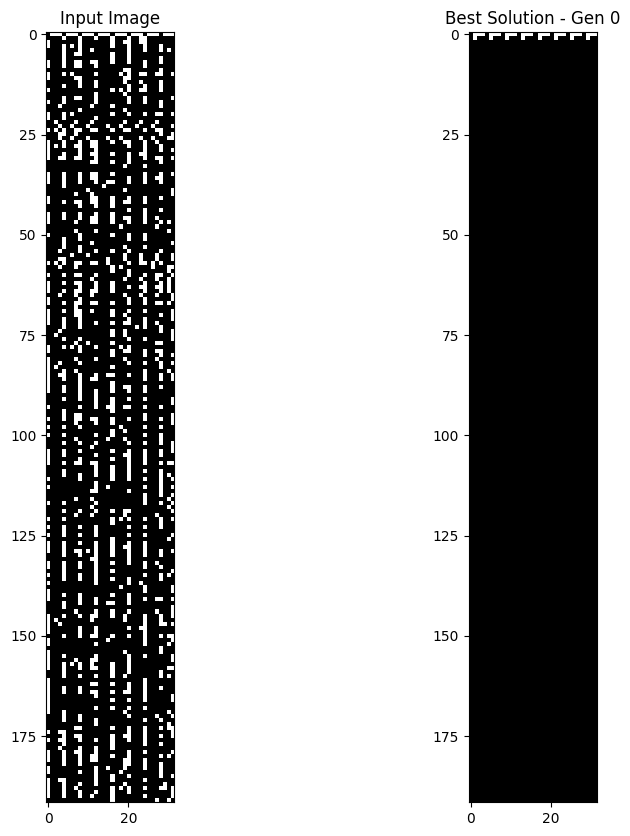

objective : bits are [1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 228
objective : bits are [1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 222
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 223
objective : bits are [1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 212
objective : bits are [1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 220
objective : bits are [1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 228
objective : bits are [1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0]
objective : rule1 is 41
objec

<Figure size 640x480 with 0 Axes>

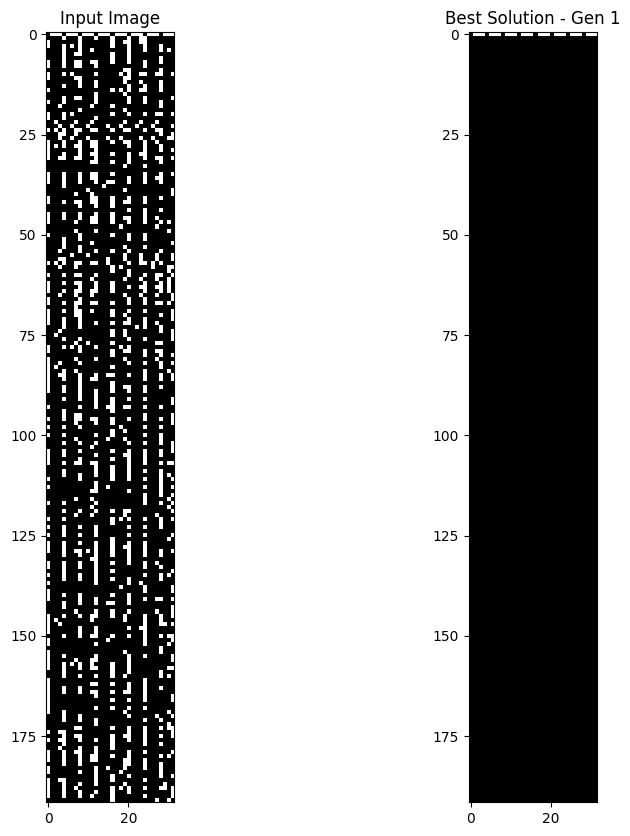

objective : bits are [1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 215
objective : bits are [1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 224
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 216
objective : bits are [1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 224
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 214
objective : bits are [1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 226
objective : bits are [1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objec

<Figure size 640x480 with 0 Axes>

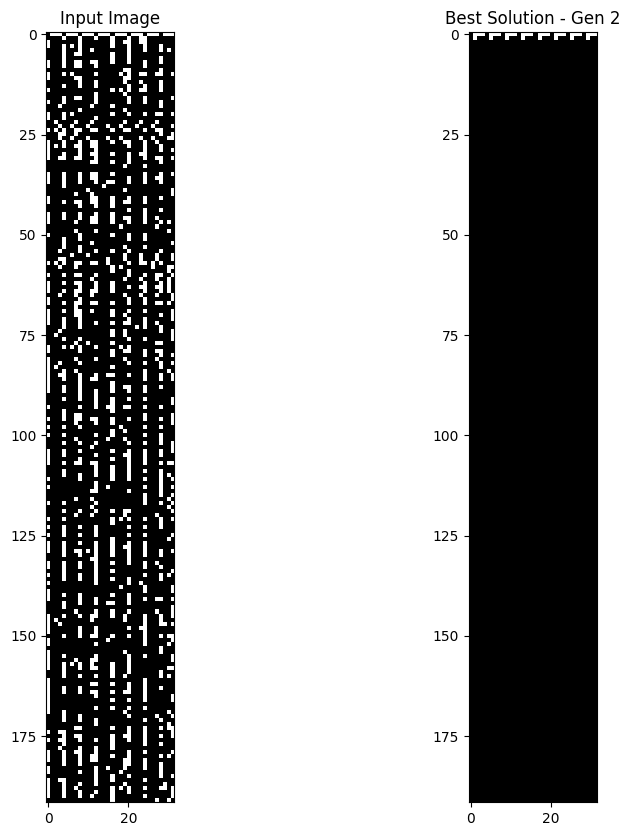

objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 106
objective : rule2 is 54
objective : rule3 is 54
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0]
objective : rule1 is 106
objective : rule2 is 54
objective : rule3 is 54
objective : bits are [1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 220
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 223
objective : bits are [1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 211
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 226
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1]
objective : rule1 is 41
obj

<Figure size 640x480 with 0 Axes>

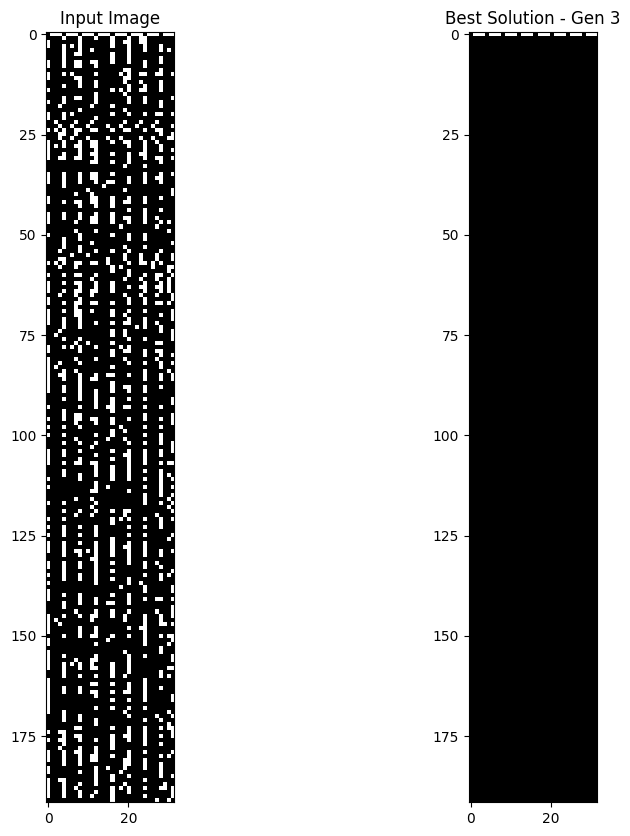

objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 213
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 212
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 216
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 225
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 218
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 216
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objec

<Figure size 640x480 with 0 Axes>

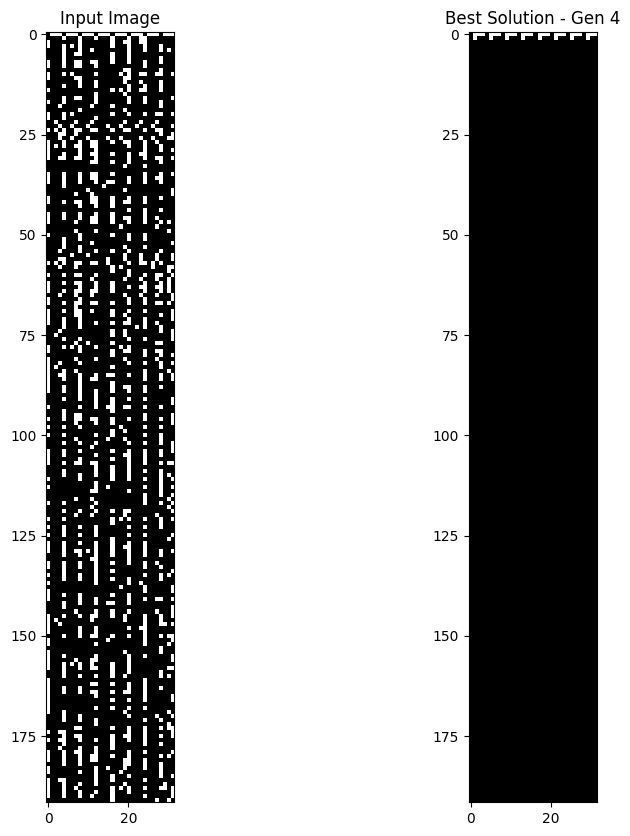

objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 220
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 222
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 226
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 213
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 228
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 224
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objec

<Figure size 640x480 with 0 Axes>

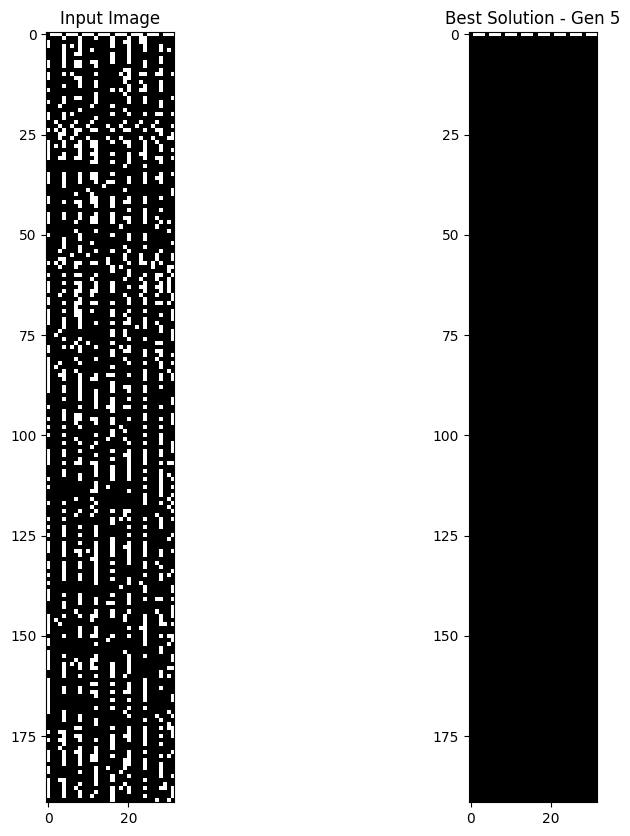

objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 227
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 210
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 208
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 221
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 0
objective : rule3 is 0
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 106
objective : rule2 is 54
objective : rule3 is 54
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
object

<Figure size 640x480 with 0 Axes>

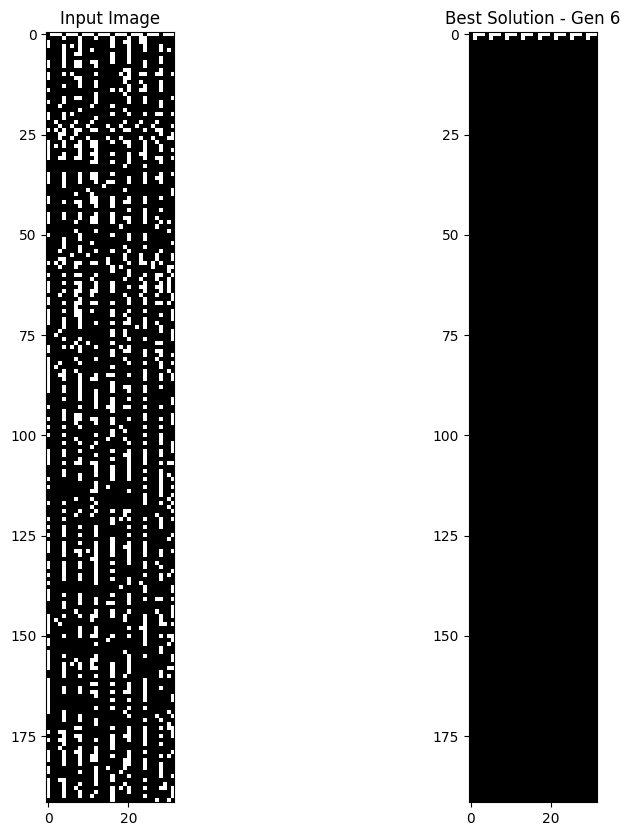

objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 219
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 220
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 218
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 208
objective : bits are [0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 218
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 0
objective : rule3 is 0
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objecti

<Figure size 640x480 with 0 Axes>

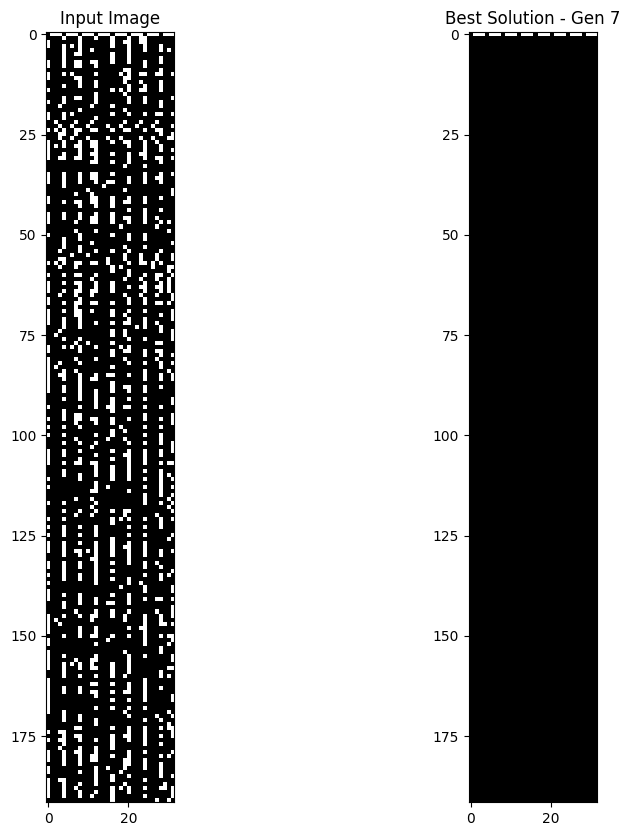

objective : bits are [0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 215
objective : bits are [0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 212
objective : bits are [0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 0
objective : rule2 is None
objective : rule3 is None
objective : bits are [0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 212
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 225
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 223
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
ob

<Figure size 640x480 with 0 Axes>

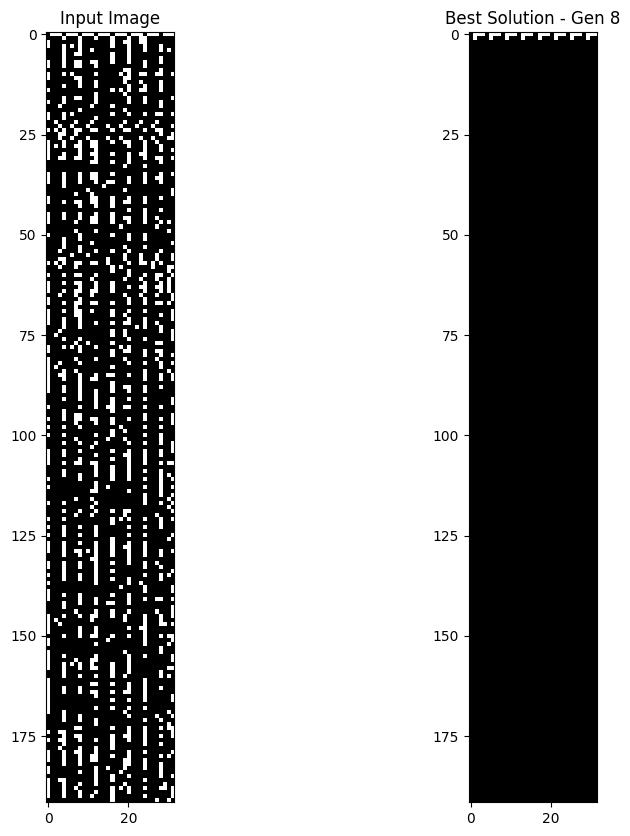

objective : bits are [0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 211
objective : bits are [0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 214
objective : bits are [0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 210
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 219
objective : bits are [0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 106
objective : rule2 is 54
objective : rule3 is 54
objective : bits are [0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 228
objective : bits are [0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]
objective : rule1 is 41
obje

<Figure size 640x480 with 0 Axes>

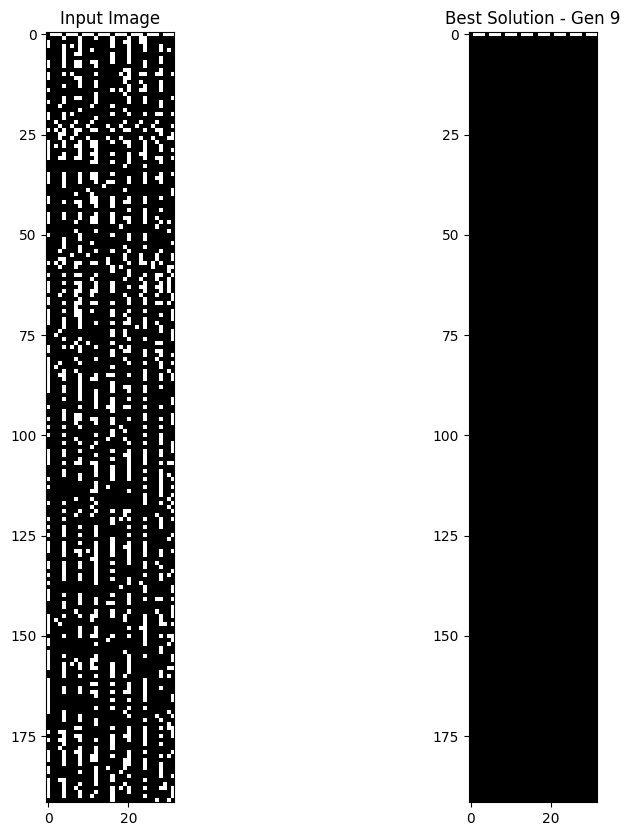

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

def generate_image(bits):

  # Decode rules
  rule1, rule2, rule3 = decode_rules(bits)
  print(f'generate_image : rule1 is {rule1}')
  print(f'generate_image : rule2 is {rule2}')
  print(f'generate_image : rule3 is {rule3}')

  # Look up eca image for rules
  if rule3 != None:
    image = eca_images[rule1][rule2][rule3]
  elif rule2 != None:
    image = eca_images[rule1][rule2]
  else:
    image = eca_images[rule1]

  return image

# Generate input image
input_image = observed_data_arr

pymils = PyMILS(BDM(ndim=2), min_size=0.5)

problem = RuleSelection(input_image, pymils,
                          'min', dtype=torch.int8, initial_bounds=(0, 1))

pop_size = 10
tournament_size = 2
mutation_prob = 0.1

crossover_op = BinaryCrossOver(problem, tournament_size=tournament_size)
mutation_op = BinaryMutation(problem, mutation_prob=mutation_prob)

ga = GeneticAlgorithm(
  problem,
  popsize=pop_size,
  operators=[crossover_op, mutation_op]
)

num_generations = 10
for gen in range(num_generations):

  # GA generation step
  ga.step()

  # Track best solution
  values = ga.population.values
  evals = ga.population.evals
  best_index = torch.argmin(evals)
  best_solution = ga.population[best_index]

  # Generate image from best solution
  best_image = generate_image(best_solution.values.numpy().tolist())

  # Create figure with subplots
  fig, axs = plt.subplots(1, 2, figsize=(10,10), dpi=100)

  # Show input and solution images
  axs[0].imshow(input_image, cmap='gray')
  axs[0].set_title('Input Image')

  axs[1].imshow(best_image, cmap='gray')
  axs[1].set_title(f'Best Solution - Gen {gen}')

  # Show/save figure
  plt.show()
  plt.savefig(f'gen_{gen}.png')

  # Clear figure for next gen
  plt.clf()

#### Best Objective over Generations

In [ ]:
import matplotlib.pyplot as plt

# using best_objectives returned by compress_image()

# Plot best objective vs generation
plt.plot(best_objectives)
plt.xlabel('Generation')
plt.ylabel('Best Objective')
plt.title('Best Objective over Generations')
plt.show()

objective : bits are [1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 209
objective : bits are [1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 226
objective : bits are [0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 221
objective : bits are [1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 208
objective : bits are [0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 214
objective : bits are [0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 218
objective : bits are [1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
objective : rule1 is 41
objec

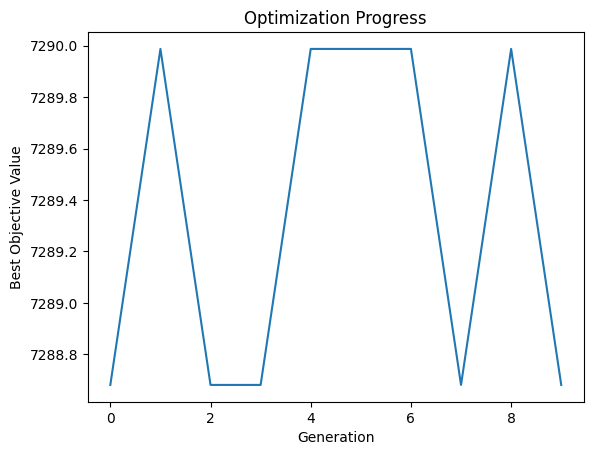

In [ ]:
import matplotlib.pyplot as plt

# Generate input image
input_image = observed_data_arr

pymils = PyMILS(BDM(ndim=2), min_size=0.5)

problem = RuleSelection(input_image, pymils,
                          'min', dtype=torch.int8, initial_bounds=(0, 1))

pop_size = 10
tournament_size = 2
mutation_prob = 0.1

crossover_op = BinaryCrossOver(problem, tournament_size=tournament_size)
mutation_op = BinaryMutation(problem, mutation_prob=mutation_prob)

ga = GeneticAlgorithm(
  problem,
  popsize=pop_size,
  operators=[crossover_op, mutation_op]
)

best_objectives = []

num_generations = 10
for gen in range(num_generations):

  # GA generation step
  ga.step()

  # Track best solution
  values = ga.population.values
  evals = ga.population.evals
  best_index = torch.argmin(evals)
  best_solution = ga.population[best_index]
  best_objective = evals[best_index]
  best_objectives.append(best_objective)


# Plot
plt.plot(range(num_generations), best_objectives)
plt.ylabel('Best Objective Value')
plt.xlabel('Generation')
plt.title('Optimization Progress')

plt.show()

#### Population Distribution at each Generation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


objective : bits are [0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 214
objective : bits are [1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0]
objective : rule1 is 0
objective : rule2 is None
objective : rule3 is None
objective : bits are [0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 208
objective : bits are [1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 219
objective : bits are [1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 228
objective : bits are [1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 218
objective : bits are [0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1]
objective : rule1 is 106
o

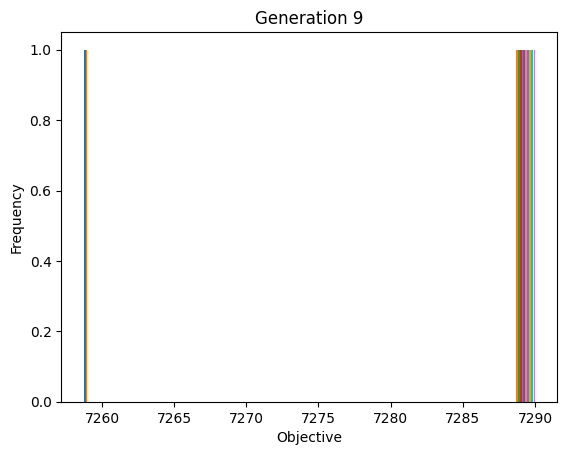

In [ ]:
import matplotlib.pyplot as plt

# Generate input image
input_image = observed_data_arr

pymils = PyMILS(BDM(ndim=2), min_size=0.5)

problem = RuleSelection(input_image, pymils,
                          'min', dtype=torch.int8, initial_bounds=(0, 1))

pop_size = 10
tournament_size = 2
mutation_prob = 0.1

crossover_op = BinaryCrossOver(problem, tournament_size=tournament_size)
mutation_op = BinaryMutation(problem, mutation_prob=mutation_prob)

ga = GeneticAlgorithm(
  problem,
  popsize=pop_size,
  operators=[crossover_op, mutation_op]
)

best_objectives = []

num_generations = 10
for gen in range(num_generations):

  # GA generation step
  ga.step()

  # Track best solution
  values = ga.population.values
  evals = ga.population.evals
  best_index = torch.argmin(evals)
  best_solution = ga.population[best_index]
  best_objective = evals[best_index]
  best_objectives.append(best_objective)

  objectives = evals # Get all objectives

  plt.hist(objectives, bins=20)
  plt.title(f"Generation {gen}")
  plt.xlabel("Objective")
  plt.ylabel("Frequency")

  plt.savefig(f"gen_{gen}_hist.png")



plt.show()

plt.clf()
plt.close()

#### Animate Evolution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


objective : bits are [1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 210
objective : bits are [0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 226
objective : bits are [0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 218
objective : bits are [1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 224
objective : bits are [0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1]
objective : rule1 is 41
objective : rule2 is 8
objective : rule3 is 221
objective : bits are [0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1]
objective : rule1 is 41
objective : rule2 is 0
objective : rule3 is 0
objective : bits are [1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0]
objective : rule1 is 41
objecti

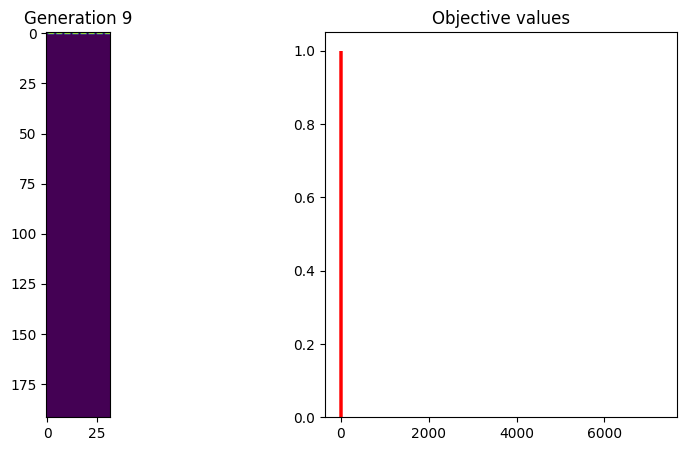

In [ ]:
import matplotlib.animation as animation

def animate(i):
    # Clear axes
    axs[0].clear()
    axs[1].clear()

    # Set title to show generation
    axs[0].set_title(f"Generation {i}")

    # Plot input image
    axs[0].imshow(input_image)

    # Track best solution
    values = ga.population.values
    evals = ga.population.evals
    best_index = torch.argmin(evals)
    best_solution = ga.population[best_index]
    best_objective = evals[best_index]
    # Get current population
    pop = ga.population

    # Plot objective values
    axs[1].hist(best_objective)
    axs[1].set_title('Objective values')

    # Highlight best solution
    axs[1].vlines(best_solution, 0, 1, colors='r')

    # Plot best solution image
    best_img = generate_image(best_solution)
    axs[0].imshow(best_img)

# Generate input image
input_image = observed_data_arr

pymils = PyMILS(BDM(ndim=2), min_size=0.5)

problem = RuleSelection(input_image, pymils,
                          'min', dtype=torch.int8, initial_bounds=(0, 1))

pop_size = 10
tournament_size = 2
mutation_prob = 0.1

crossover_op = BinaryCrossOver(problem, tournament_size=tournament_size)
mutation_op = BinaryMutation(problem, mutation_prob=mutation_prob)

ga = GeneticAlgorithm(
  problem,
  popsize=pop_size,
  operators=[crossover_op, mutation_op]
)


fig, axs = plt.subplots(1, 2, figsize=(10,5))

num_generations = 10
for gen in range(num_generations):

  # GA generation step
  ga.step()

  # Animate frame
  animate(gen)


# Create animation
anim = animation.FuncAnimation(fig, animate, frames=num_generations)

plt.show()